In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from IPython.display import display
import json
import requests
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df =pd.read_csv(r'C:\Users\admin\Documents\SuburbData2019.csv')

In [3]:
df.shape

(276830, 303)

In [4]:
df.columns

Index(['Suburb', 'Offence category', 'Subcategory', 'Jan 1995', 'Feb 1995',
       'Mar 1995', 'Apr 1995', 'May 1995', 'Jun 1995', 'Jul 1995',
       ...
       'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019',
       'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019'],
      dtype='object', length=303)

In [5]:
df.head()

,Suburb,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,...,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019
0,Aarons Pass,Homicide,Murder *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aarons Pass,Homicide,Attempted murder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aarons Pass,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aarons Pass,Homicide,Manslaughter *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aarons Pass,Assault,Domestic violence related assault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df['total'] = df.sum(axis =1)

In [7]:
df

,Suburb,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,...,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,total
0,Aarons Pass,Homicide,Murder *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aarons Pass,Homicide,Attempted murder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aarons Pass,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aarons Pass,Homicide,Manslaughter *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aarons Pass,Assault,Domestic violence related assault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5,Aarons Pass,Assault,Non-domestic violence related assault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Aarons Pass,Assault,Assault Police,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Aarons Pass,Sexual offences,Sexual assault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Aarons Pass,Sexual offences,"Indecent assault, act of indecency and other s...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Aarons Pass,Abduction and kidnapping,Abduction and kidnapping,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.rename(columns = {'Offence category':'offence'}, inplace =True)

In [9]:
len(df.offence.unique())

21

In [10]:
len(df.Subcategory.unique())

62

In [11]:
off = pd.DataFrame(df['offence'].value_counts()).reset_index()
off.rename(columns = {'index':'Type of Offence','offence':'Number of Offences'}, inplace = True)

In [12]:
off = off.head(8)
off

,Type of Offence,Number of Offences
0,Drug offences,71440
1,Theft,49115
2,Against justice procedures,26790
3,Disorderly conduct,17860
4,Homicide,17860
5,Robbery,13395
6,Assault,13395
7,Sexual offences,8930


<function matplotlib.pyplot.show(*args, **kw)>

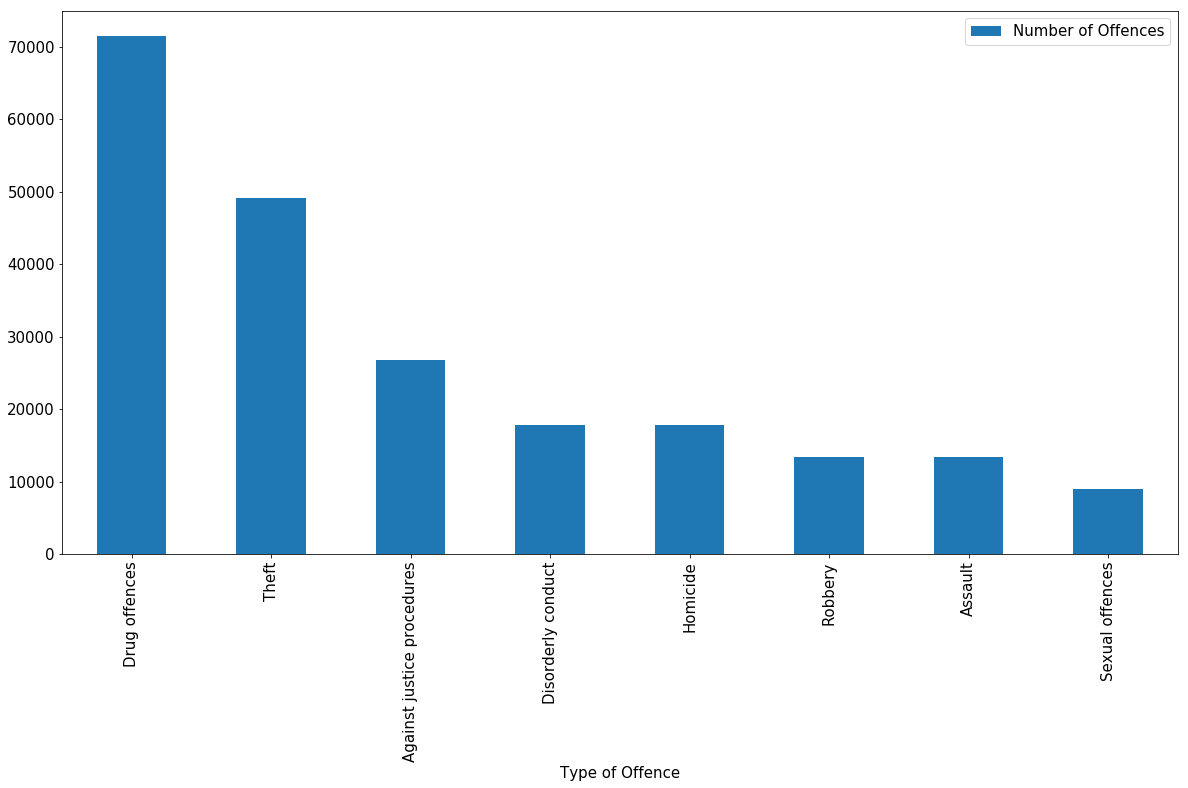

In [13]:
plt.rcParams.update({'font.size': 15})
off.plot(x="Type of Offence", y="Number of Offences", kind="bar",figsize =(20,10))
plt.show

In [14]:
df1 = pd.DataFrame(df.groupby('Suburb').sum()).reset_index()
df1.head()

,Suburb,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,...,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,total
0,Aarons Pass,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,80
1,Abbotsbury,11,5,20,4,6,8,9,11,16,...,7,9,2,7,5,8,9,10,7,3715
2,Abbotsford,15,18,31,17,19,20,25,7,26,...,19,13,8,13,14,6,18,14,9,6009
3,Abercrombie,0,0,1,0,0,1,2,1,0,...,0,2,3,0,2,2,0,4,3,597
4,Abercrombie River,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,82


In [15]:
dfs = df1.sort_values(by=['total'], ascending = False)
dfs = dfs.head(15)
dfs

,Suburb,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,...,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,total
3669,Sydney,1031,818,961,772,999,786,811,829,851,...,932,900,945,958,956,862,801,1124,1039,354404
392,Blacktown,334,286,379,308,363,333,326,383,345,...,1035,1088,1105,1055,1023,1074,1098,1302,1051,223718
3116,Parramatta,461,461,477,536,502,508,471,456,552,...,783,855,856,853,756,810,947,999,764,193939
2333,Liverpool,413,419,488,460,410,470,404,428,466,...,1173,1139,1236,1204,1213,1288,1315,1349,1365,192096
1282,Dubbo,366,285,328,305,361,388,379,386,348,...,591,647,655,608,722,610,755,635,678,157117
1855,Haymarket,192,217,220,184,195,143,180,172,194,...,651,607,954,760,756,807,841,765,772,153156
4303,Wollongong,268,289,261,292,287,309,339,340,337,...,539,586,563,606,656,636,590,618,636,150271
770,Campbelltown,252,266,295,297,358,323,342,339,386,...,649,775,802,729,643,740,516,583,630,149722
3144,Penrith,415,385,360,324,390,355,371,366,379,...,616,731,655,690,708,785,669,749,737,145963
177,Bankstown,295,243,364,308,354,312,304,325,334,...,581,549,565,499,616,616,659,645,660,137588


<function matplotlib.pyplot.show(*args, **kw)>

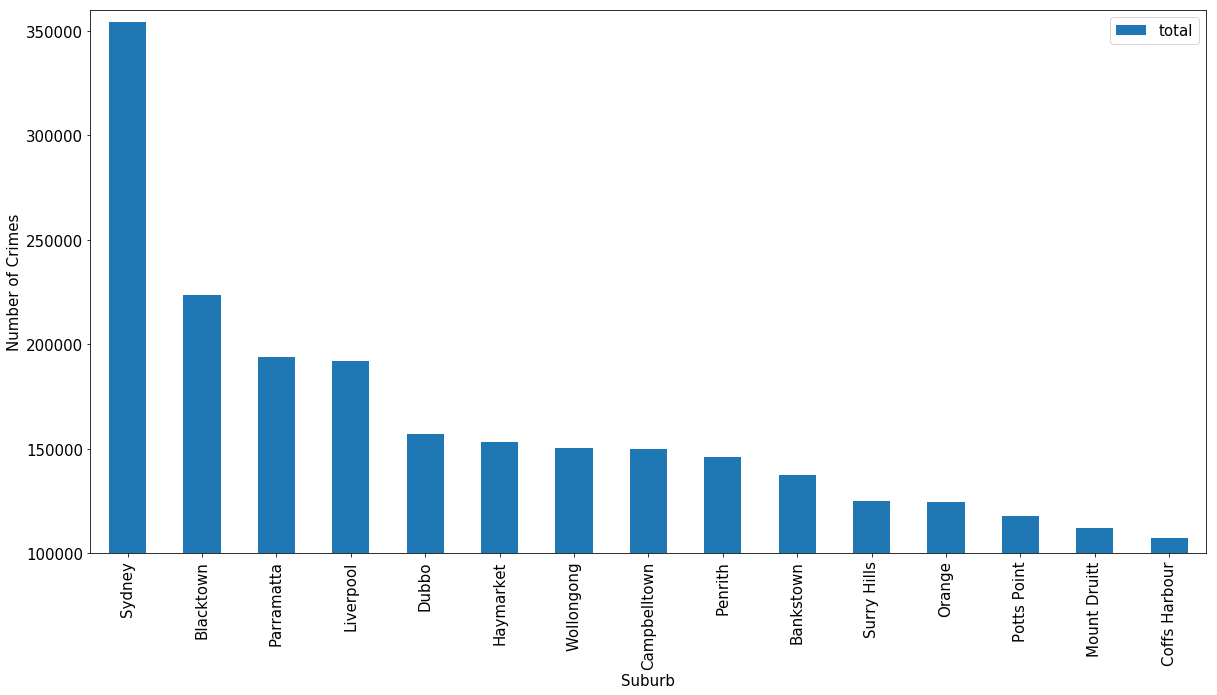

In [16]:
plt.rcParams.update({'font.size': 15})
dfs.plot(x="Suburb", y="total", kind="bar",figsize =(20,10), ylim =(100000,360000))
plt.ylabel('Number of Crimes')
plt.show

In [17]:
df2 = pd.DataFrame(df.groupby('offence').sum(),).reset_index()
df2.head()

,offence,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,...,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,total
0,Abduction and kidnapping,15,15,23,22,14,13,19,23,13,...,21,19,16,8,17,13,18,28,17,7975
1,Against justice procedures,1253,1157,1294,1173,1268,1206,1230,1250,1328,...,5953,5974,5968,5834,6228,5785,6431,6004,6854,1039103
2,Arson,268,198,208,252,231,229,279,305,273,...,394,369,381,429,513,486,448,496,467,148691
3,Assault,3167,2993,3116,2928,2823,2848,2881,3127,3188,...,5140,5002,4818,4874,5172,5236,5515,5747,6053,1571300
4,Betting and gaming offences,3,3,6,8,4,7,5,2,3,...,13,6,12,10,3,3,4,6,8,3581


In [18]:
df2.sort_values(by=['total','offence'], ascending = False)

,offence,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,...,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,total
19,Theft,27396,24942,27875,25238,26624,26329,27132,28918,29029,...,18617,19441,17608,18524,19262,19669,19287,18405,18039,7802834
11,Malicious damage to property,6173,5351,5744,5524,5736,5607,6220,5790,6153,...,4589,4333,4396,4532,4651,4676,4946,5026,5019,2122315
3,Assault,3167,2993,3116,2928,2823,2848,2881,3127,3188,...,5140,5002,4818,4874,5172,5236,5515,5747,6053,1571300
20,Transport regulatory offences,40,57,57,53,86,66,84,87,53,...,9111,9515,9588,9549,9414,9585,9654,9925,9533,1241538
1,Against justice procedures,1253,1157,1294,1173,1268,1206,1230,1250,1328,...,5953,5974,5968,5834,6228,5785,6431,6004,6854,1039103
7,Drug offences,1462,1668,2031,1755,1577,1637,1390,1494,1360,...,4356,4224,4111,4273,4404,4194,4226,4325,4318,743862
9,"Intimidation, stalking and harassment",346,331,433,416,475,533,517,621,615,...,2631,2902,2633,2706,2967,3005,3133,3177,3035,571128
6,Disorderly conduct,1274,1108,1112,1063,1001,941,907,904,961,...,1595,1615,1600,1546,1601,1683,1712,1752,1789,519926
12,Other offences,592,514,559,490,609,537,573,657,601,...,1235,1208,992,1042,1035,1055,1215,1168,1331,360601
10,Liquor offences,67,72,99,101,87,68,58,81,109,...,1035,1051,1066,960,888,775,781,982,1018,283203


In [19]:
df95 = df.columns[3:15]
df95

Index(['Jan 1995', 'Feb 1995', 'Mar 1995', 'Apr 1995', 'May 1995', 'Jun 1995',
       'Jul 1995', 'Aug 1995', 'Sep 1995', 'Oct 1995', 'Nov 1995', 'Dec 1995'],
      dtype='object')

In [20]:
df.columns

Index(['Suburb', 'offence', 'Subcategory', 'Jan 1995', 'Feb 1995', 'Mar 1995',
       'Apr 1995', 'May 1995', 'Jun 1995', 'Jul 1995',
       ...
       'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019',
       'Oct 2019', 'Nov 2019', 'Dec 2019', 'total'],
      dtype='object', length=304)

In [21]:
df95 = pd.DataFrame(df[df.columns[3:15]].sum()).reset_index()
df95.rename(columns = {0:'1995'}, inplace = True )
df95['index'] = df95['index'].apply(lambda x: x.split(' ')[0])
df96 = pd.DataFrame(df[df.columns[15:27]].sum()).reset_index()
df96.rename(columns = {0:'1996'}, inplace = True )
df96['index'] = df96['index'].apply(lambda x: x.split(' ')[0])
df97 = pd.DataFrame(df[df.columns[27:39]].sum()).reset_index()
df97.rename(columns = {0:'1997'}, inplace = True )
df97['index'] = df97['index'].apply(lambda x: x.split(' ')[0])
df98 = pd.DataFrame(df[df.columns[39:51]].sum()).reset_index()
df98.rename(columns = {0:'1998'}, inplace = True )
df98['index'] = df98['index'].apply(lambda x: x.split(' ')[0])
df99 = pd.DataFrame(df[df.columns[51:63]].sum()).reset_index()
df99.rename(columns = {0:'1999'}, inplace = True )
df99['index'] = df99['index'].apply(lambda x: x.split(' ')[0])
df00 = pd.DataFrame(df[df.columns[63:75]].sum()).reset_index()
df00.rename(columns = {0:'2000'}, inplace = True )
df00['index'] = df00['index'].apply(lambda x: x.split(' ')[0])
df01 = pd.DataFrame(df[df.columns[75:87]].sum()).reset_index()
df01.rename(columns = {0:'2001'}, inplace = True )
df01['index'] = df01['index'].apply(lambda x: x.split(' ')[0])
df02 = pd.DataFrame(df[df.columns[87:99]].sum()).reset_index()
df02.rename(columns = {0:'2002'}, inplace = True )
df02['index'] = df02['index'].apply(lambda x: x.split(' ')[0])
df03 = pd.DataFrame(df[df.columns[99:111]].sum()).reset_index()
df03.rename(columns = {0:'2003'}, inplace = True )
df03['index'] = df03['index'].apply(lambda x: x.split(' ')[0])
df04 = pd.DataFrame(df[df.columns[111:123]].sum()).reset_index()
df04.rename(columns = {0:'2004'}, inplace = True )
df04['index'] = df04['index'].apply(lambda x: x.split(' ')[0])
df05 = pd.DataFrame(df[df.columns[123:135]].sum()).reset_index()
df05.rename(columns = {0:'2005'}, inplace = True )
df05['index'] = df05['index'].apply(lambda x: x.split(' ')[0])
df06 = pd.DataFrame(df[df.columns[135:147]].sum()).reset_index()
df06.rename(columns = {0:'2006'}, inplace = True )
df06['index'] = df06['index'].apply(lambda x: x.split(' ')[0])
df07 = pd.DataFrame(df[df.columns[147:159]].sum()).reset_index()
df07.rename(columns = {0:'2007'}, inplace = True )
df07['index'] = df07['index'].apply(lambda x: x.split(' ')[0])
df08 = pd.DataFrame(df[df.columns[159:171]].sum()).reset_index()
df08.rename(columns = {0:'2008'}, inplace = True )
df08['index'] = df08['index'].apply(lambda x: x.split(' ')[0])
df09 = pd.DataFrame(df[df.columns[171:183]].sum()).reset_index()
df09.rename(columns = {0:'2009'}, inplace = True )
df09['index'] = df09['index'].apply(lambda x: x.split(' ')[0])
df10 = pd.DataFrame(df[df.columns[183:195]].sum()).reset_index()
df10.rename(columns = {0:'2010'}, inplace = True )
df10['index'] = df10['index'].apply(lambda x: x.split(' ')[0])
df11 = pd.DataFrame(df[df.columns[195:207]].sum()).reset_index()
df11.rename(columns = {0:'2011'}, inplace = True )
df11['index'] = df11['index'].apply(lambda x: x.split(' ')[0])
df12 = pd.DataFrame(df[df.columns[207:219]].sum()).reset_index()
df12.rename(columns = {0:'2012'}, inplace = True )
df12['index'] = df12['index'].apply(lambda x: x.split(' ')[0])
df13 = pd.DataFrame(df[df.columns[219:231]].sum()).reset_index()
df13.rename(columns = {0:'2013'}, inplace = True )
df13['index'] = df13['index'].apply(lambda x: x.split(' ')[0])
df14 = pd.DataFrame(df[df.columns[231:243]].sum()).reset_index()
df14.rename(columns = {0:'2014'}, inplace = True )
df14['index'] = df14['index'].apply(lambda x: x.split(' ')[0])
df15 = pd.DataFrame(df[df.columns[243:255]].sum()).reset_index()
df15.rename(columns = {0:'2015'}, inplace = True )
df15['index'] = df15['index'].apply(lambda x: x.split(' ')[0])
df16 = pd.DataFrame(df[df.columns[255:267]].sum()).reset_index()
df16.rename(columns = {0:'2016'}, inplace = True )
df16['index'] = df16['index'].apply(lambda x: x.split(' ')[0])
df17 = pd.DataFrame(df[df.columns[267:279]].sum()).reset_index()
df17.rename(columns = {0:'2017'}, inplace = True )
df17['index'] = df17['index'].apply(lambda x: x.split(' ')[0])
df18 = pd.DataFrame(df[df.columns[279:291]].sum()).reset_index()
df18.rename(columns = {0:'2018'}, inplace = True )
df18['index'] = df18['index'].apply(lambda x: x.split(' ')[0])
df19 = pd.DataFrame(df[df.columns[291:303]].sum()).reset_index()
df19.rename(columns = {0:'2019'}, inplace = True )
df19['index'] = df19['index'].apply(lambda x: x.split(' ')[0])


In [22]:
df19

,index,2019
0,Jan,61847
1,Feb,55307
2,Mar,61113
3,Apr,57238
4,May,58718
5,Jun,55844
6,Jul,57111
7,Aug,59431
8,Sep,59271
9,Oct,60297


In [23]:
df43 = pd.merge(df95,df96, on = 'index')
df42 = pd.merge(df43,df97, on = 'index')
df41 = pd.merge(df42,df98, on = 'index')
df40 = pd.merge(df41,df99, on = 'index')
df20 = pd.merge(df40,df00, on = 'index')
df21 = pd.merge(df20,df01, on = 'index')
df22 = pd.merge(df21,df02, on = 'index')
df23 = pd.merge(df22,df03, on = 'index')
df24 = pd.merge(df23,df04, on = 'index')
df25 = pd.merge(df24,df05, on = 'index')
df26 = pd.merge(df25,df06, on = 'index')
df27 = pd.merge(df26,df07, on = 'index')
df28 = pd.merge(df27,df08, on = 'index')
df29 = pd.merge(df28,df09, on = 'index')
df30 = pd.merge(df29,df10, on = 'index')
df31 = pd.merge(df30,df11, on = 'index')
df32 = pd.merge(df31,df12, on = 'index')
df33 = pd.merge(df32,df13, on = 'index')
df34 = pd.merge(df33,df14, on = 'index')
df35 = pd.merge(df34,df15, on = 'index')
df36 = pd.merge(df35,df16, on = 'index')
df37 = pd.merge(df36,df17, on = 'index')
df38 = pd.merge(df37,df18, on = 'index')
dft = pd.merge(df38,df19, on = 'index')
dft


,index,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Jan,43792,50431,54665,59549,59536,65145,70650,67919,65333,...,60272,61130,59101,60208,60891,63604,61190,62091,62750,61847
1,Feb,39799,46206,49851,53189,54941,60577,63768,59640,60351,...,52417,54453,53547,51423,52935,55901,58288,56366,54998,55307
2,Mar,44200,49974,55395,59793,60431,64375,67314,65336,66722,...,58862,60723,57432,58551,58626,60251,60295,61289,59914,61113
3,Apr,40626,45984,50995,55499,55425,59243,62704,62866,60871,...,53440,55791,54630,54645,53531,57532,58777,56377,56577,57238
4,May,42032,49617,52907,57854,58602,62142,66131,62426,63554,...,54373,55990,56244,57000,54887,59540,56913,59597,59381,58718
5,Jun,41476,48720,49689,56638,55138,61067,65515,59254,60777,...,52963,54483,52663,54116,52406,57052,55321,56151,54122,55844
6,Jul,42831,49641,51129,57403,57073,64156,66687,62293,60248,...,52256,52127,53207,52760,51896,56987,56764,54792,53961,57111
7,Aug,44944,51163,53140,59664,59623,62759,67630,62629,57529,...,52953,53907,53632,55526,52497,56446,57927,55897,56363,59431
8,Sep,45255,50190,54337,58631,59304,60570,65098,62758,59528,...,53399,55165,54151,53785,54061,54985,57143,55184,55014,59271
9,Oct,48695,54161,56904,59970,60674,67325,68426,65356,59665,...,55422,56649,57133,56630,58333,58583,58803,60544,56455,60297


In [24]:
ty =pd.DataFrame(dft.sum()).reset_index()
ty.drop([0],inplace =True)
ty.rename(columns = {'index':'year', 0:'Number'},inplace = True)
max_value = ty['Number'].max()
min_value = ty['Number'].min()
ty['Normal'] = (ty['Number'] - min_value) / (max_value - min_value)*100
ty

,year,Number,Normal
1,1995,527509,0
2,1996,600026,27.1923
3,1997,644550,43.8879
4,1998,693403,62.2067
5,1999,700877,65.0093
6,2000,757176,86.1202
7,2001,794191,100
8,2002,757019,86.0613
9,2003,733406,77.2069
10,2004,688069,60.2065


<function matplotlib.pyplot.show(*args, **kw)>

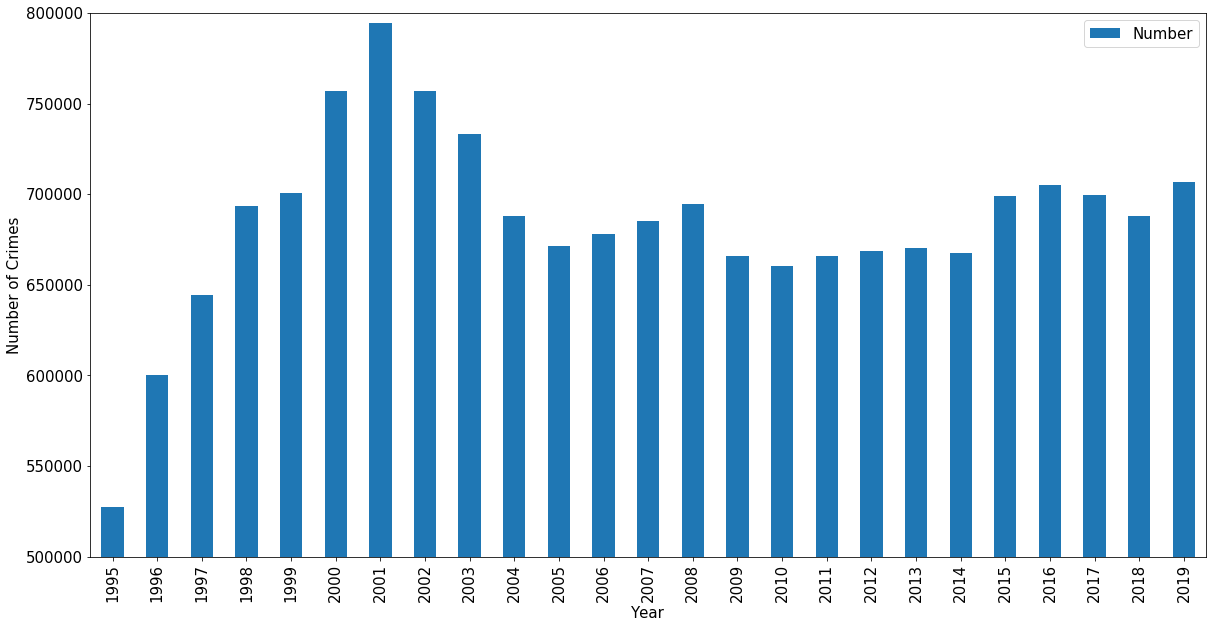

In [25]:
plt.rcParams.update({'font.size': 15})
ty.plot(x="year", y="Number", kind="bar",figsize =(20,10),ylim=(500000,800000))
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show

In [26]:
dft.describe(include='all')

,index,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,12,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,43959.083333,50002.166667,53712.500000,57783.583333,58406.416667,63098.000000,66182.583333,63084.916667,61117.166667,...,55017.750000,55492.416667,55726.250000,55858.750000,55627.750000,58257.916667,58761.000000,58275.666667,57335.916667,58878.833333
std,NaN,2755.000065,2327.910840,2935.905265,2002.367892,2172.785370,2431.864305,2140.043137,2367.993913,2721.097066,...,2817.379734,3291.148942,2342.437081,2625.415608,3263.829461,2387.880439,2169.801499,2731.960646,2771.949280,2077.981531
min,NaN,39799.000000,45984.000000,49689.000000,53189.000000,54941.000000,59243.000000,62704.000000,59254.000000,57529.000000,...,52256.000000,49058.000000,52663.000000,51423.000000,51896.000000,54985.000000,55321.000000,54792.000000,53961.000000,55307.000000
25%,NaN,41893.000000,49392.750000,51095.500000,57211.750000,56661.000000,60944.500000,65097.500000,62392.750000,59630.750000,...,52960.500000,54316.500000,53610.750000,54033.250000,52825.500000,56851.750000,57085.500000,56087.500000,55010.000000,57206.250000
50%,NaN,43996.000000,50082.000000,53738.500000,57817.500000,59420.000000,63457.500000,65823.000000,62812.000000,60314.500000,...,53906.500000,55478.000000,55437.000000,56078.000000,54474.000000,57627.500000,58532.500000,57888.000000,56516.000000,59351.000000
75%,NaN,45487.250000,51236.250000,55772.250000,59577.750000,59895.500000,64567.500000,67393.000000,63907.250000,61541.750000,...,56282.000000,56487.000000,57674.750000,57387.750000,58406.250000,59717.750000,60461.000000,60730.250000,59514.250000,60252.000000


In [27]:
plt.rcParams.update({'font.size': 32})

<function matplotlib.pyplot.show(*args, **kw)>

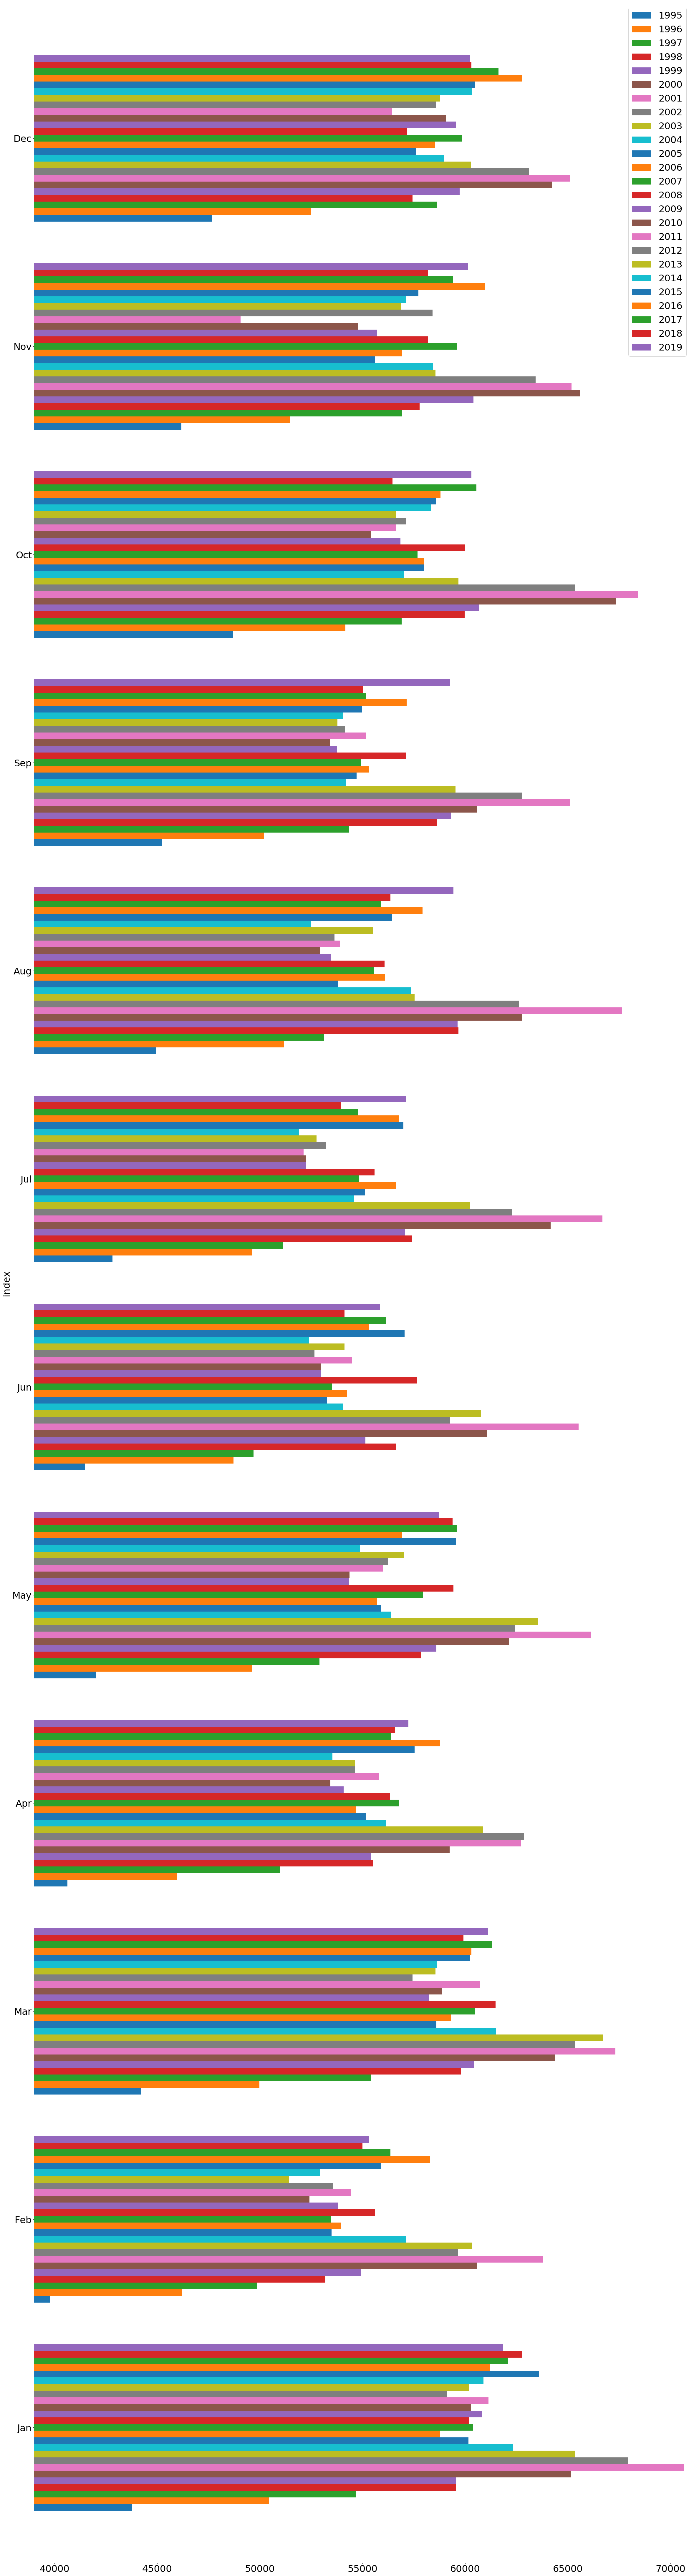

In [28]:
dft.plot(x="index", y=["1995", "1996", "1997","1998","1999","2000" ,"2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"], kind="barh",figsize =(40,160), width = 0.8, xlim = (39000,71000))
plt.show

In [29]:
dftrans = dft.transpose().reset_index()

In [30]:
dftrans.drop([0],inplace = True)
dftrans

,index,0,1,2,3,4,5,6,7,8,9,10,11
1,1995,43792,39799,44200,40626,42032,41476,42831,44944,45255,48695,46184,47675
2,1996,50431,46206,49974,45984,49617,48720,49641,51163,50190,54161,51456,52483
3,1997,54665,49851,55395,50995,52907,49689,51129,53140,54337,56904,56916,58622
4,1998,59549,53189,59793,55499,57854,56638,57403,59664,58631,59970,57781,57432
5,1999,59536,54941,60431,55425,58602,55138,57073,59623,59304,60674,60404,59726
6,2000,65145,60577,64375,59243,62142,61067,64156,62759,60570,67325,65590,64227
7,2001,70650,63768,67314,62704,66131,65515,66687,67630,65098,68426,65172,65096
8,2002,67919,59640,65336,62866,62426,59254,62293,62629,62758,65356,63431,63111
9,2003,65333,60351,66722,60871,63554,60777,60248,57529,59528,59665,58550,60278
10,2004,62344,57129,61504,56152,56374,54033,54578,57371,54176,57006,58433,58969


In [31]:
dftrans.rename(columns = {0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'Jun',6:'Jul',7:'Aug',8:'Sep',9:'Oct',10:'Nov',11:'Dec'},inplace = True)
dftrans

,index,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1995,43792,39799,44200,40626,42032,41476,42831,44944,45255,48695,46184,47675
2,1996,50431,46206,49974,45984,49617,48720,49641,51163,50190,54161,51456,52483
3,1997,54665,49851,55395,50995,52907,49689,51129,53140,54337,56904,56916,58622
4,1998,59549,53189,59793,55499,57854,56638,57403,59664,58631,59970,57781,57432
5,1999,59536,54941,60431,55425,58602,55138,57073,59623,59304,60674,60404,59726
6,2000,65145,60577,64375,59243,62142,61067,64156,62759,60570,67325,65590,64227
7,2001,70650,63768,67314,62704,66131,65515,66687,67630,65098,68426,65172,65096
8,2002,67919,59640,65336,62866,62426,59254,62293,62629,62758,65356,63431,63111
9,2003,65333,60351,66722,60871,63554,60777,60248,57529,59528,59665,58550,60278
10,2004,62344,57129,61504,56152,56374,54033,54578,57371,54176,57006,58433,58969


In [32]:
dfm= pd.DataFrame(dftrans.sum()).reset_index()
dfm.drop([0],inplace =True)
dfm.rename(columns = {'index':'month', 0:'Number'},inplace = True)
dfm['days'] = [31,28,31,30,31,30,31,31,30,31,30,31]
dfm['Daily Crime'] = dfm['Number']/dfm['days']
dfm

,month,Number,days,Daily Crime
1,Jan,1512752.0,31,48798.451613
2,Feb,1361387.0,28,48620.964286
3,Mar,1490220.0,31,48071.612903
4,Apr,1385919.0,30,46197.300000
5,May,1427602.0,31,46051.677419
6,Jun,1369104.0,30,45636.800000
7,Jul,1382318.0,31,44590.903226
8,Aug,1405987.0,31,45354.419355
9,Sep,1397878.0,30,46595.933333
10,Oct,1467547.0,31,47340.225806


<function matplotlib.pyplot.show(*args, **kw)>

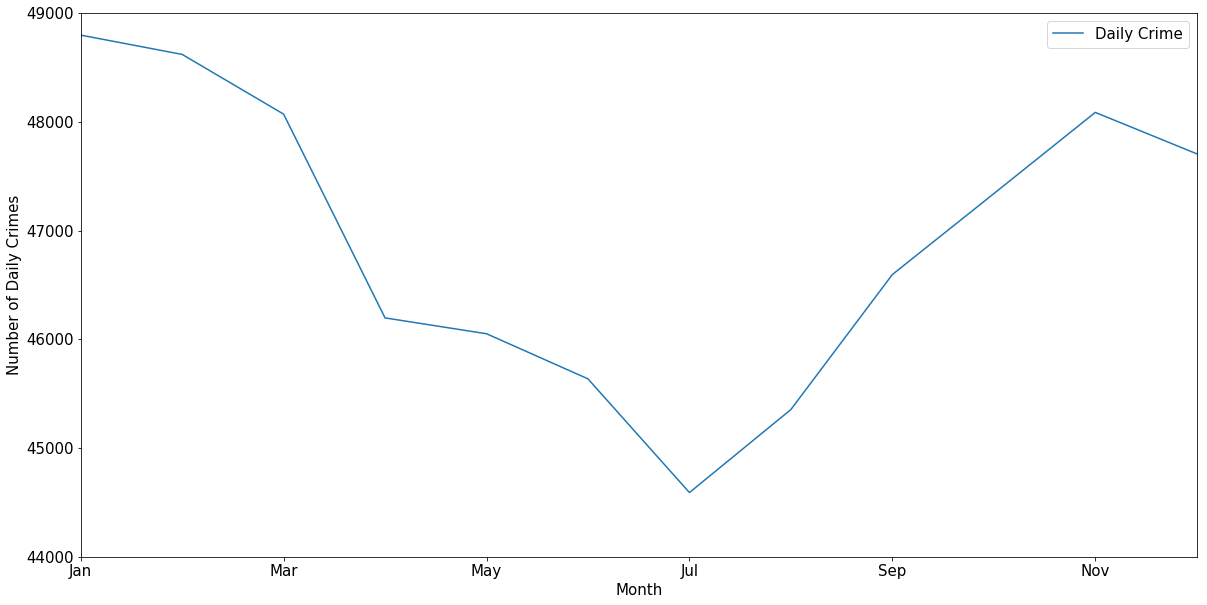

In [33]:
plt.rcParams.update({'font.size': 15})
dfm.plot(x="month", y="Daily Crime", kind="line",figsize =(20,10),ylim=(44000,49000))
plt.xlabel('Month')
plt.ylabel('Number of Daily Crimes')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

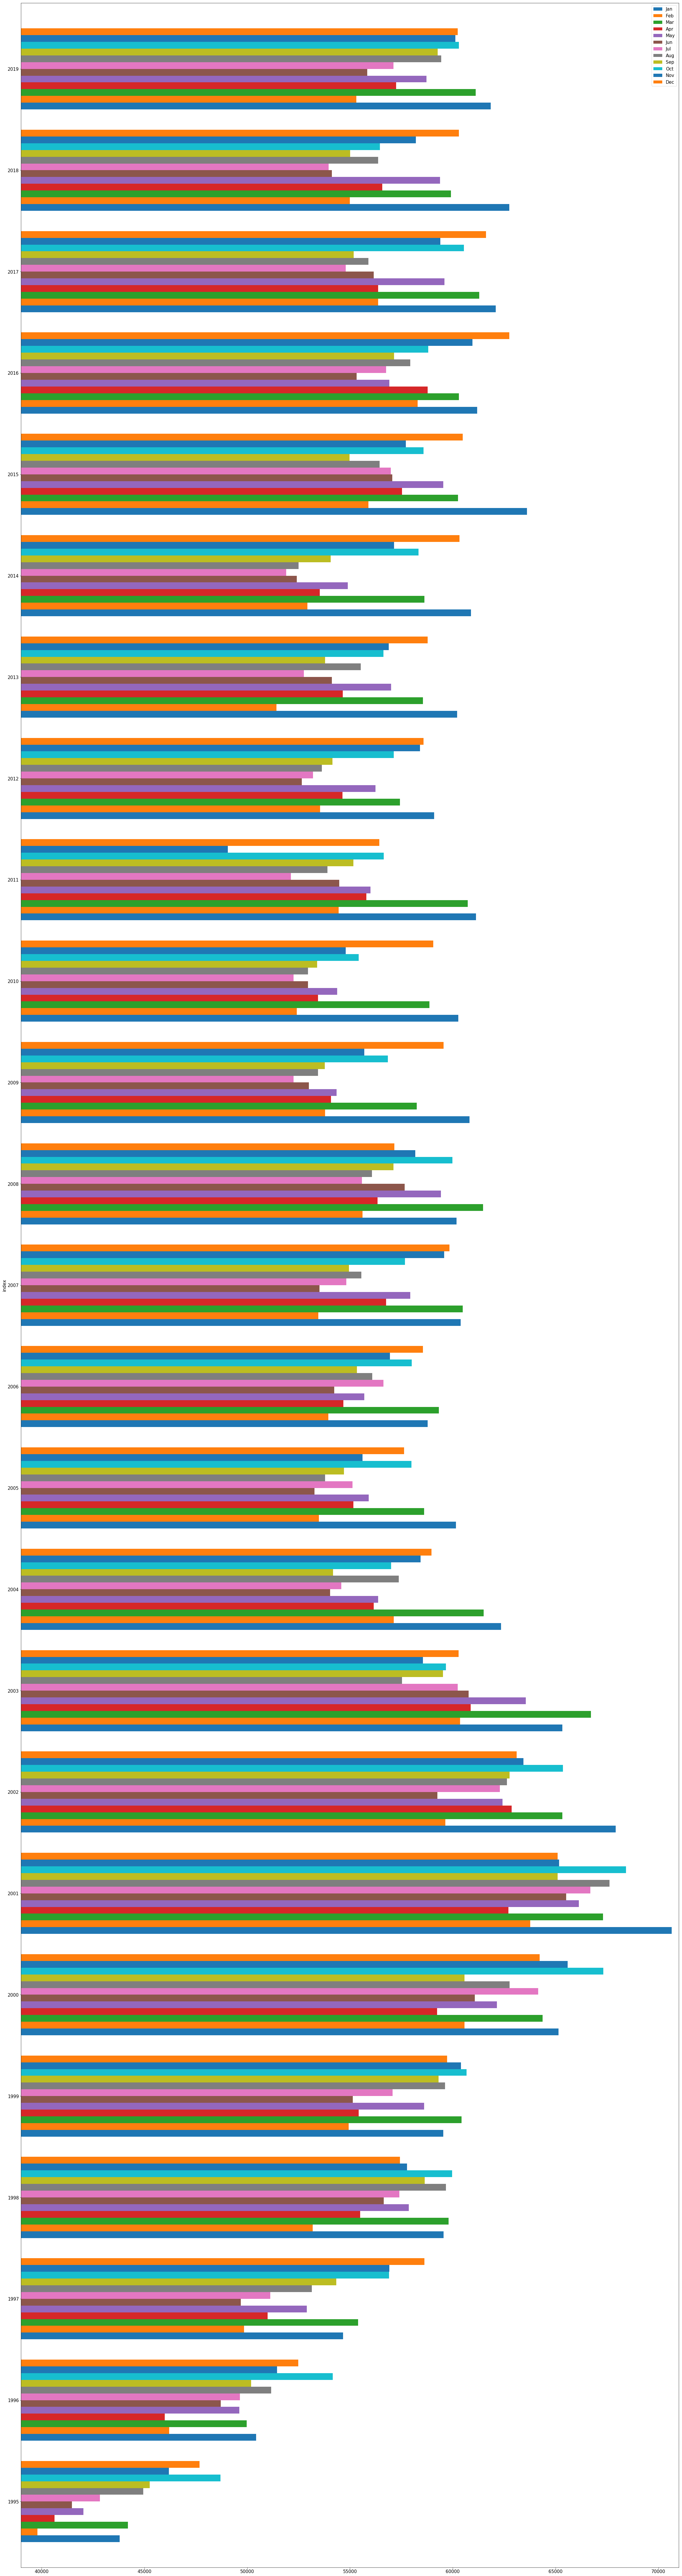

In [34]:
dftrans.plot(x="index", y=["Jan", "Feb", "Mar","Apr","May","Jun" ,"Jul","Aug","Sep","Oct","Nov","Dec"], kind="barh",figsize =(40,160), width = 0.8, xlim = (39000,71000))
plt.show

In [35]:
dfsyd = df[df['Suburb']=='Sydney']
dfsy = dfsyd[['Suburb','offence','Subcategory','total']]
dfs = dfsy.groupby('offence').sum().reset_index()
dfs.rename(columns = {'total':'sydney'},inplace = True)
dfs.sort_values(by=['sydney'],ascending = False, inplace=True)
dfs = dfs.head(7)
dfs

,offence,sydney
19,Theft,221949
3,Assault,28642
10,Liquor offences,14083
11,Malicious damage to property,14076
7,Drug offences,14024
6,Disorderly conduct,11277
1,Against justice procedures,11194


In [36]:
dfb = df[df['Suburb']=='Blacktown']
dfb = dfb[['Suburb','offence','Subcategory','total']]
dfb = dfb.groupby('offence').sum().reset_index()
dfb.rename(columns = {'total':'blacktown'},inplace = True)
dfb.sort_values(by=['blacktown'],ascending = False, inplace=True)
dfb= dfb.head(7)
dfb

,offence,blacktown
19,Theft,73207
20,Transport regulatory offences,71243
1,Against justice procedures,16907
3,Assault,16857
11,Malicious damage to property,15148
9,"Intimidation, stalking and harassment",6291
7,Drug offences,5422


In [37]:
dfp = df[df['Suburb']=='Parramatta']
dfp = dfp[['Suburb','offence','Subcategory','total']]
dfp = dfp.groupby('offence').sum().reset_index()
dfp.rename(columns = {'total':'parra'},inplace = True)
dfp.sort_values(by=['parra'],ascending = False, inplace=True)
dfp= dfp.head(7)
dfp

,offence,parra
19,Theft,92934
20,Transport regulatory offences,33913
1,Against justice procedures,15207
3,Assault,13351
11,Malicious damage to property,11268
7,Drug offences,5789
6,Disorderly conduct,4068


In [38]:
parsyd = pd.concat([dfs, dfp], axis=1, ignore_index=True)
parsyd

,0,1,2,3
1,Against justice procedures,11194.0,Against justice procedures,15207.0
3,Assault,28642.0,Assault,13351.0
6,Disorderly conduct,11277.0,Disorderly conduct,4068.0
7,Drug offences,14024.0,Drug offences,5789.0
10,Liquor offences,14083.0,NaN,NaN
11,Malicious damage to property,14076.0,Malicious damage to property,11268.0
19,Theft,221949.0,Theft,92934.0
20,NaN,NaN,Transport regulatory offences,33913.0


In [39]:
parsyd.dropna(inplace =True)
parsyd

,0,1,2,3
1,Against justice procedures,11194.0,Against justice procedures,15207.0
3,Assault,28642.0,Assault,13351.0
6,Disorderly conduct,11277.0,Disorderly conduct,4068.0
7,Drug offences,14024.0,Drug offences,5789.0
11,Malicious damage to property,14076.0,Malicious damage to property,11268.0
19,Theft,221949.0,Theft,92934.0


In [40]:
parsyd.drop(columns=[2],inplace = True)
parsyd

,0,1,3
1,Against justice procedures,11194.0,15207.0
3,Assault,28642.0,13351.0
6,Disorderly conduct,11277.0,4068.0
7,Drug offences,14024.0,5789.0
11,Malicious damage to property,14076.0,11268.0
19,Theft,221949.0,92934.0


In [41]:
parsyd.rename(columns = {'offence':'offence','Sydney':'Sydney',3:'Parramatta'},inplace = True)
parsyd

,0,1,Parramatta
1,Against justice procedures,11194.0,15207.0
3,Assault,28642.0,13351.0
6,Disorderly conduct,11277.0,4068.0
7,Drug offences,14024.0,5789.0
11,Malicious damage to property,14076.0,11268.0
19,Theft,221949.0,92934.0


In [42]:
fin = pd.concat([parsyd, dfb], axis=1, ignore_index=True)
fin

,0,1,2,3,4
1,Against justice procedures,11194.0,15207.0,Against justice procedures,16907.0
3,Assault,28642.0,13351.0,Assault,16857.0
6,Disorderly conduct,11277.0,4068.0,NaN,NaN
7,Drug offences,14024.0,5789.0,Drug offences,5422.0
9,NaN,NaN,NaN,"Intimidation, stalking and harassment",6291.0
11,Malicious damage to property,14076.0,11268.0,Malicious damage to property,15148.0
19,Theft,221949.0,92934.0,Theft,73207.0
20,NaN,NaN,NaN,Transport regulatory offences,71243.0


In [43]:
fin.dropna(inplace= True)
fin

,0,1,2,3,4
1,Against justice procedures,11194.0,15207.0,Against justice procedures,16907.0
3,Assault,28642.0,13351.0,Assault,16857.0
7,Drug offences,14024.0,5789.0,Drug offences,5422.0
11,Malicious damage to property,14076.0,11268.0,Malicious damage to property,15148.0
19,Theft,221949.0,92934.0,Theft,73207.0


In [44]:
fin.drop(columns=[3],inplace = True)
fin

,0,1,2,4
1,Against justice procedures,11194.0,15207.0,16907.0
3,Assault,28642.0,13351.0,16857.0
7,Drug offences,14024.0,5789.0,5422.0
11,Malicious damage to property,14076.0,11268.0,15148.0
19,Theft,221949.0,92934.0,73207.0


In [45]:
fin.rename(columns = {0:'offence',1:'Sydney',2:'Parramatta',4:'Blacktown'},inplace = True)
fin

,offence,Sydney,Parramatta,Blacktown
1,Against justice procedures,11194.0,15207.0,16907.0
3,Assault,28642.0,13351.0,16857.0
7,Drug offences,14024.0,5789.0,5422.0
11,Malicious damage to property,14076.0,11268.0,15148.0
19,Theft,221949.0,92934.0,73207.0


In [46]:
import seaborn as sns

In [47]:
fin['total'] = fin.Sydney+fin.Parramatta+fin.Blacktown

<function matplotlib.pyplot.show(*args, **kw)>

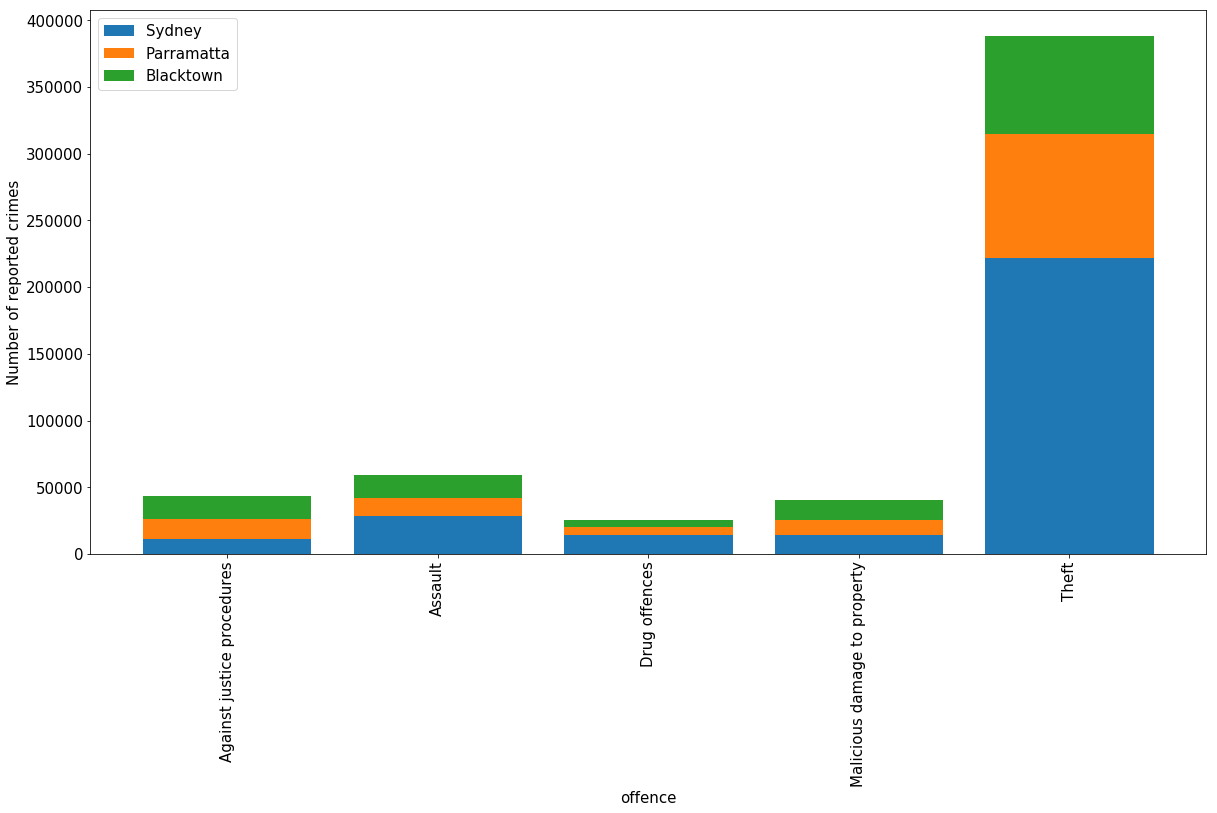

In [48]:
plt.rcParams.update({'font.size': 15})
fin.plot(x="offence", y=["Sydney", "Parramatta", "Blacktown"], kind="bar",stacked = True, figsize =(20,10), width = 0.8, )
plt.ylabel('Number of reported crimes')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

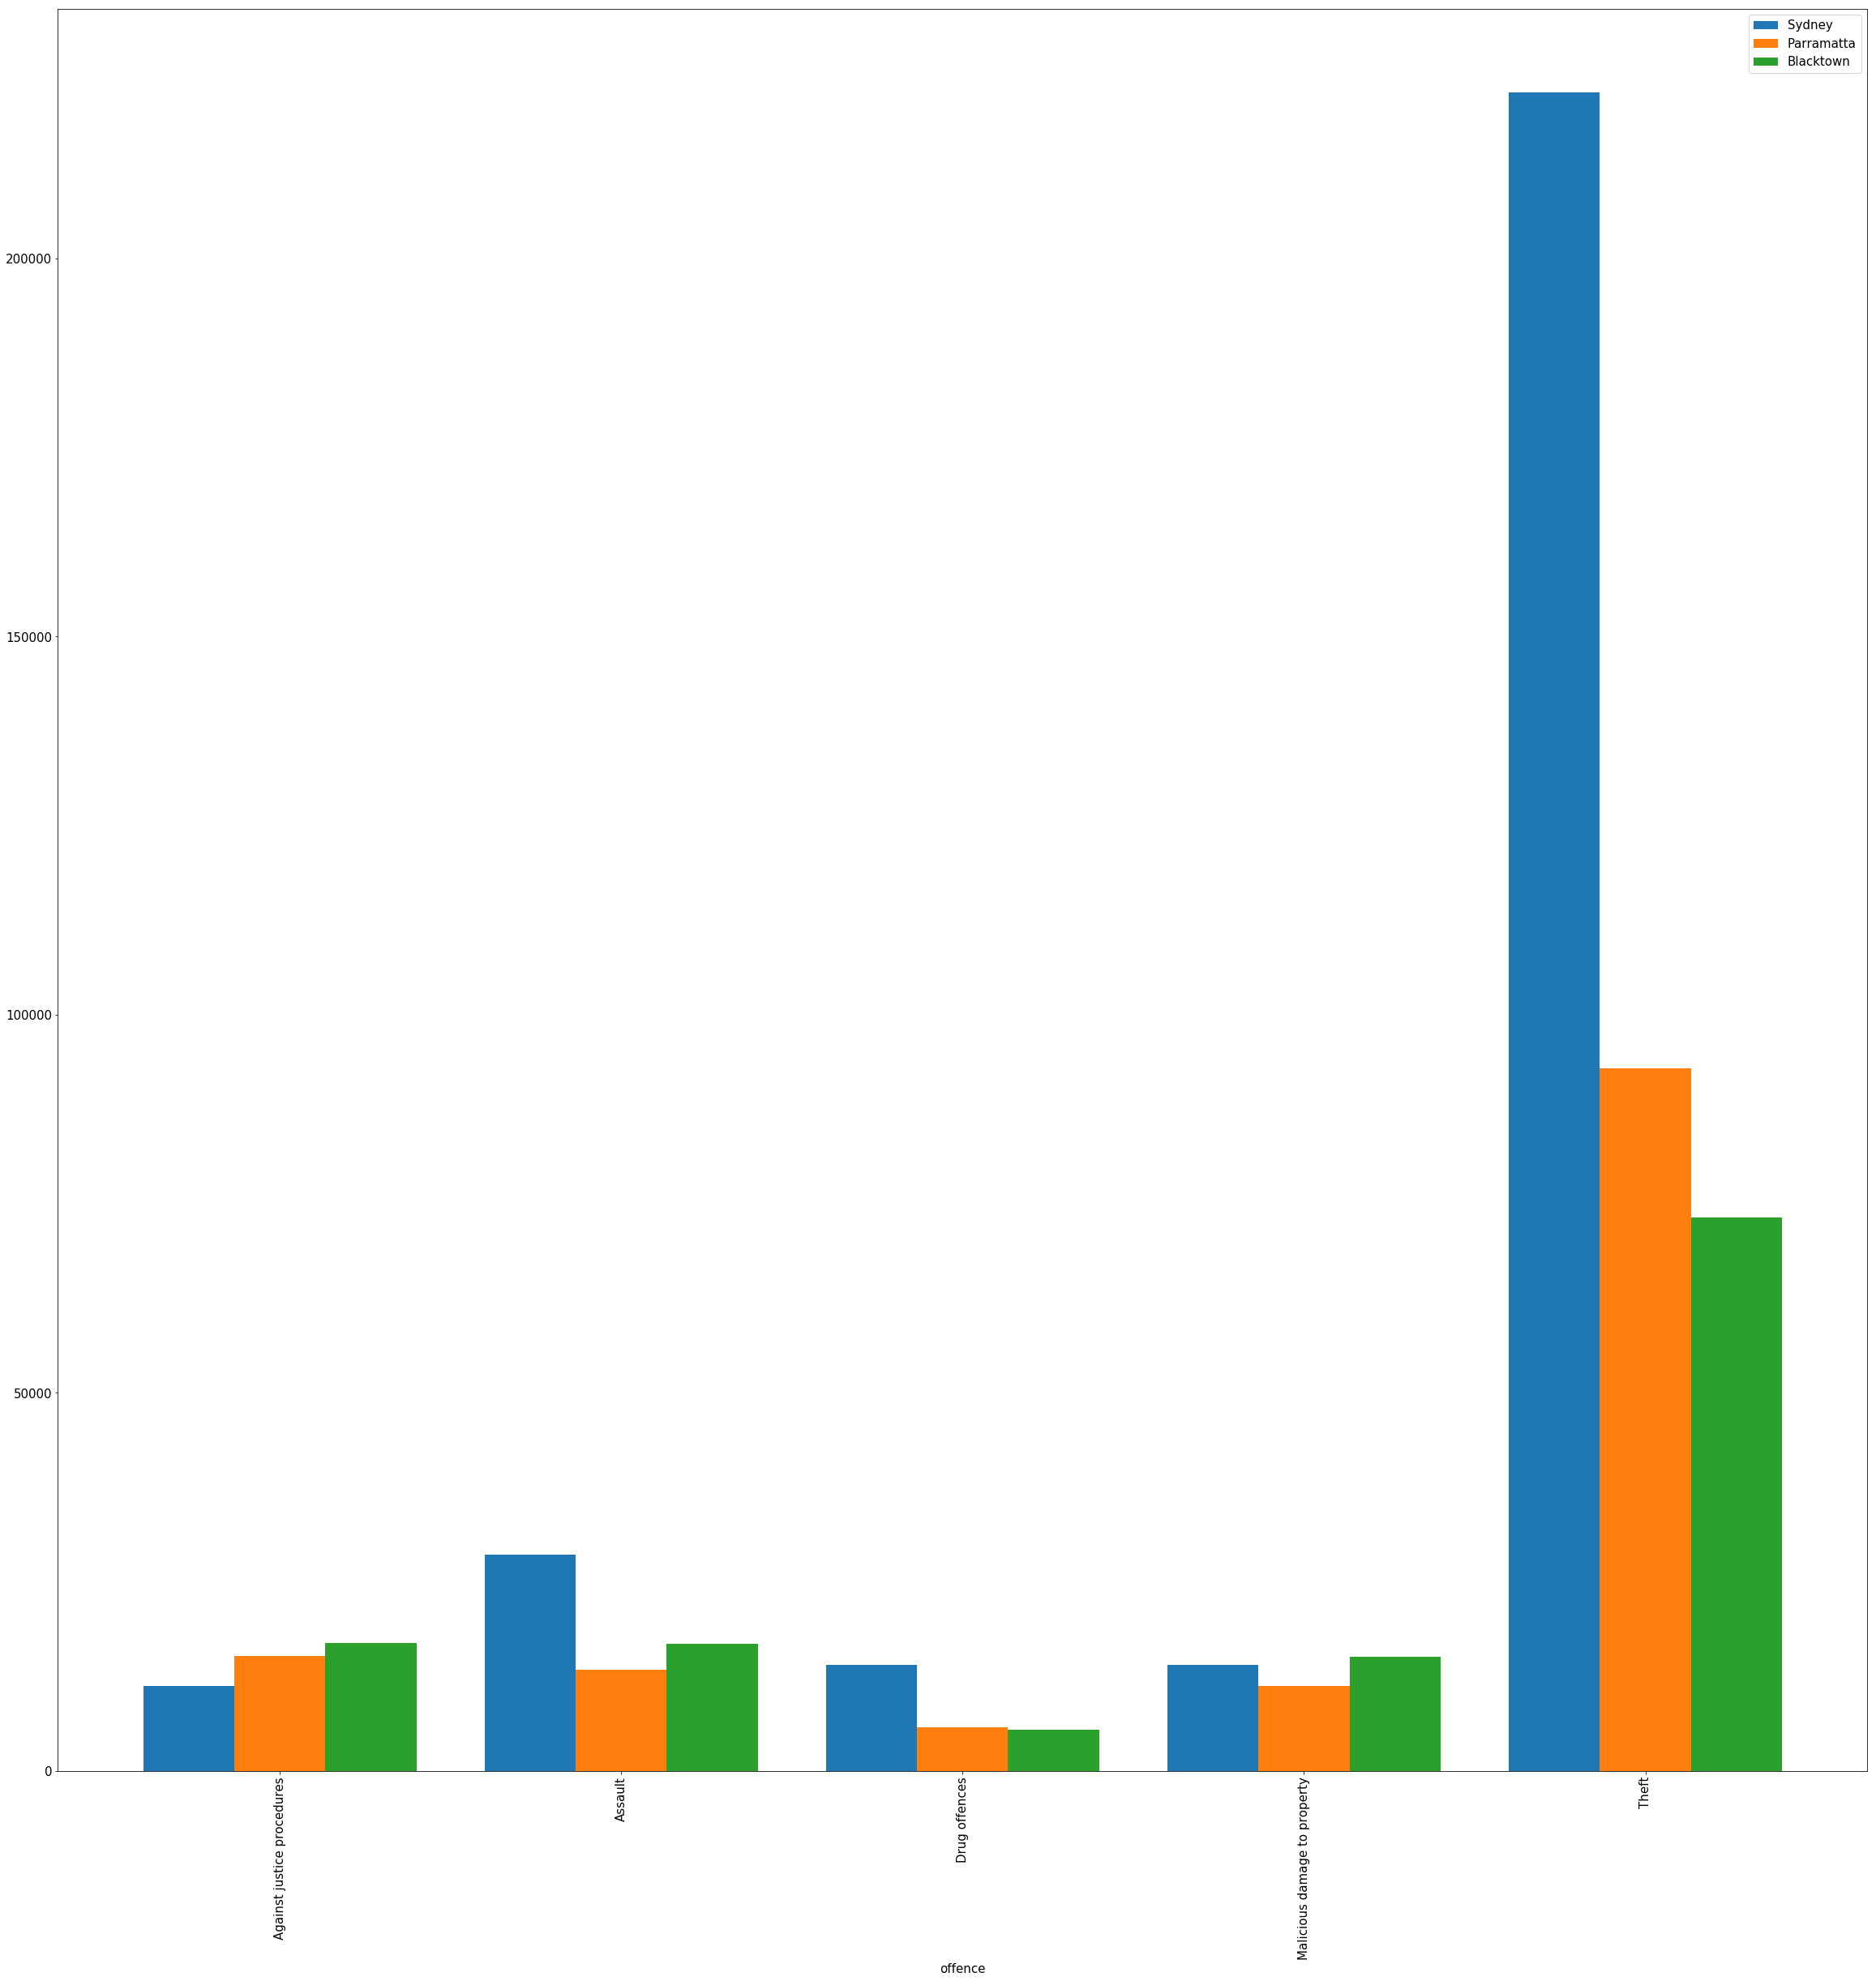

In [49]:
fin.plot(x="offence", y=["Sydney", "Parramatta", "Blacktown"], kind="bar", figsize =(40,40), width = 0.8, )
plt.show

In [50]:
fint= fin.transpose().reset_index()
fint

,index,1,3,7,11,19
0,offence,Against justice procedures,Assault,Drug offences,Malicious damage to property,Theft
1,Sydney,11194,28642,14024,14076,221949
2,Parramatta,15207,13351,5789,11268,92934
3,Blacktown,16907,16857,5422,15148,73207
4,total,43308,58850,25235,40492,388090


In [51]:
fint.rename(columns = {'index':'Suburb',1:'Against justice procedures',3:'Assault',7:'Drug offences',11:'Malicious damage to property',19:'Theft'},inplace = True)
fint

,Suburb,Against justice procedures,Assault,Drug offences,Malicious damage to property,Theft
0,offence,Against justice procedures,Assault,Drug offences,Malicious damage to property,Theft
1,Sydney,11194,28642,14024,14076,221949
2,Parramatta,15207,13351,5789,11268,92934
3,Blacktown,16907,16857,5422,15148,73207
4,total,43308,58850,25235,40492,388090


In [52]:
fint.drop([0,4],inplace = True)
fint

,Suburb,Against justice procedures,Assault,Drug offences,Malicious damage to property,Theft
1,Sydney,11194,28642,14024,14076,221949
2,Parramatta,15207,13351,5789,11268,92934
3,Blacktown,16907,16857,5422,15148,73207


<function matplotlib.pyplot.show(*args, **kw)>

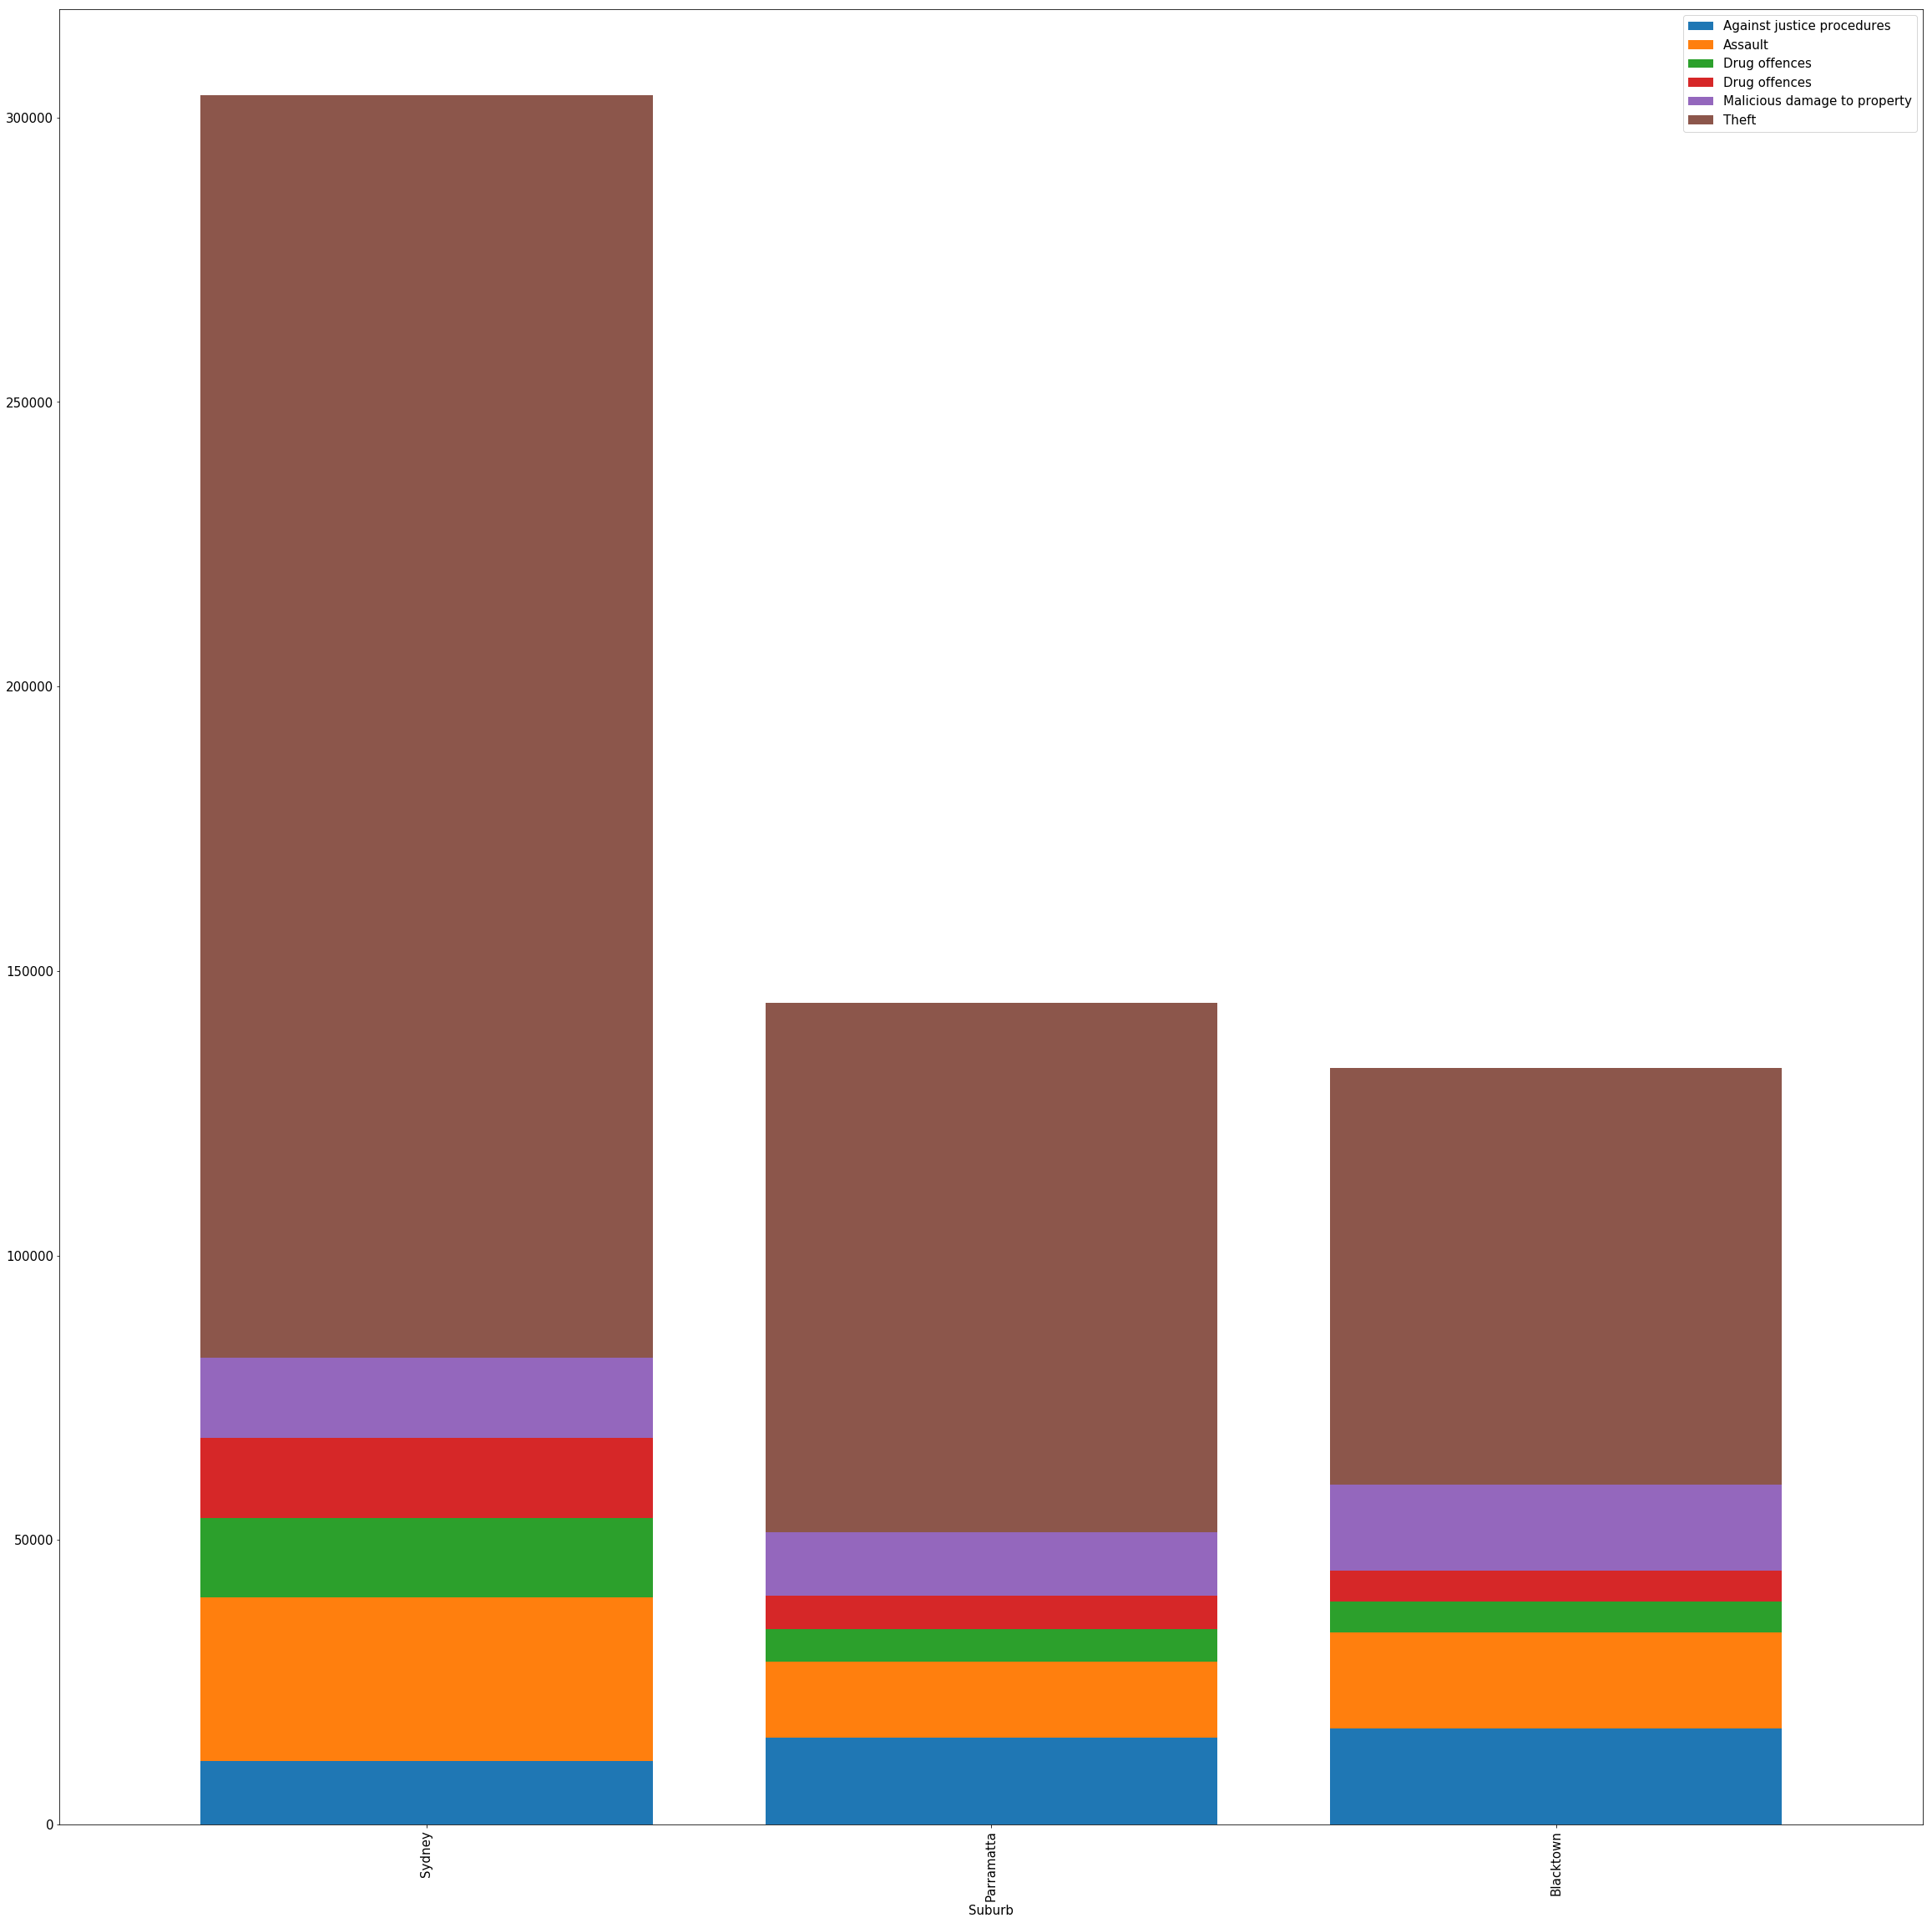

In [53]:
fint.plot(x="Suburb", y=["Against justice procedures", "Assault", "Drug offences","Drug offences","Malicious damage to property","Theft"], kind="bar",stacked = True, figsize =(40,40), width = 0.8, )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

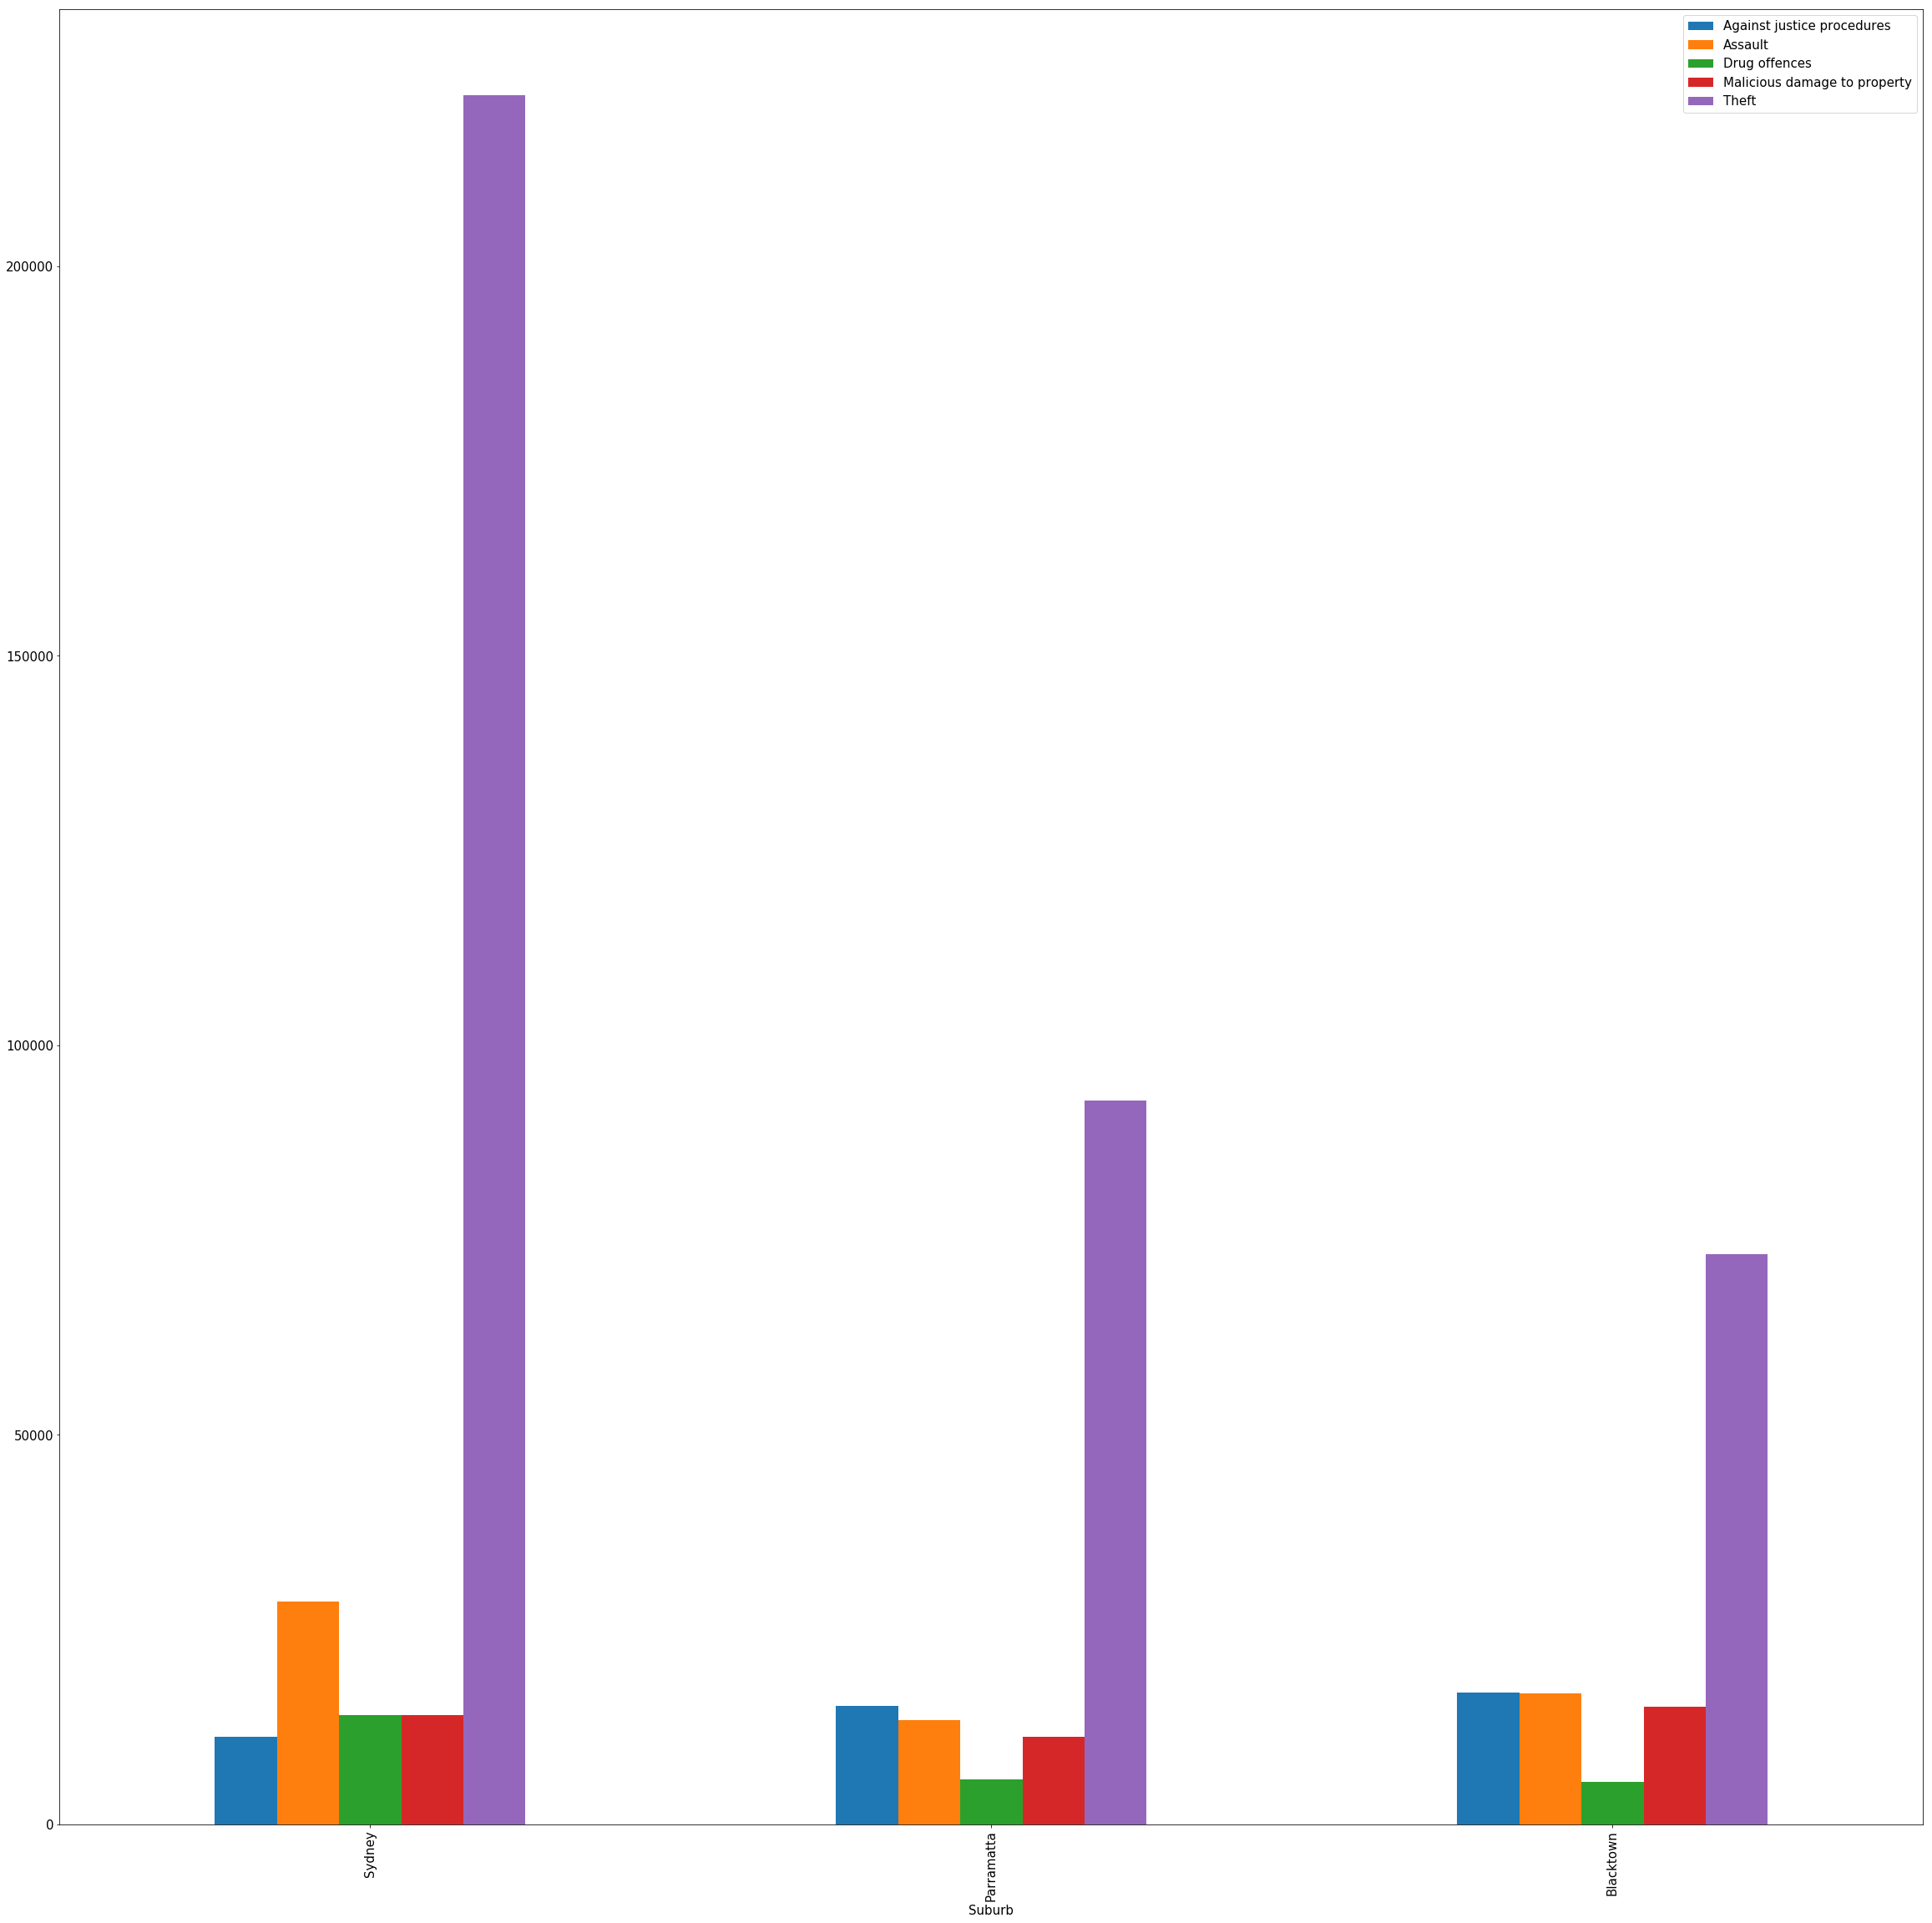

In [54]:
fint.plot(x="Suburb", y=["Against justice procedures", "Assault", "Drug offences","Malicious damage to property","Theft"], kind="bar", figsize =(40,40))
plt.show

In [55]:
pop = pd.read_csv(r'C:\Users\admin\Documents\Sydney-population-2020-04-28.csv')
pop.head()

,Year,Population
0,1995,3819000
1,1996,3857000
2,1997,3837000
3,1998,3818000
4,1999,3799000


In [56]:
pop['Population'].min()

3761000

<function matplotlib.pyplot.show(*args, **kw)>

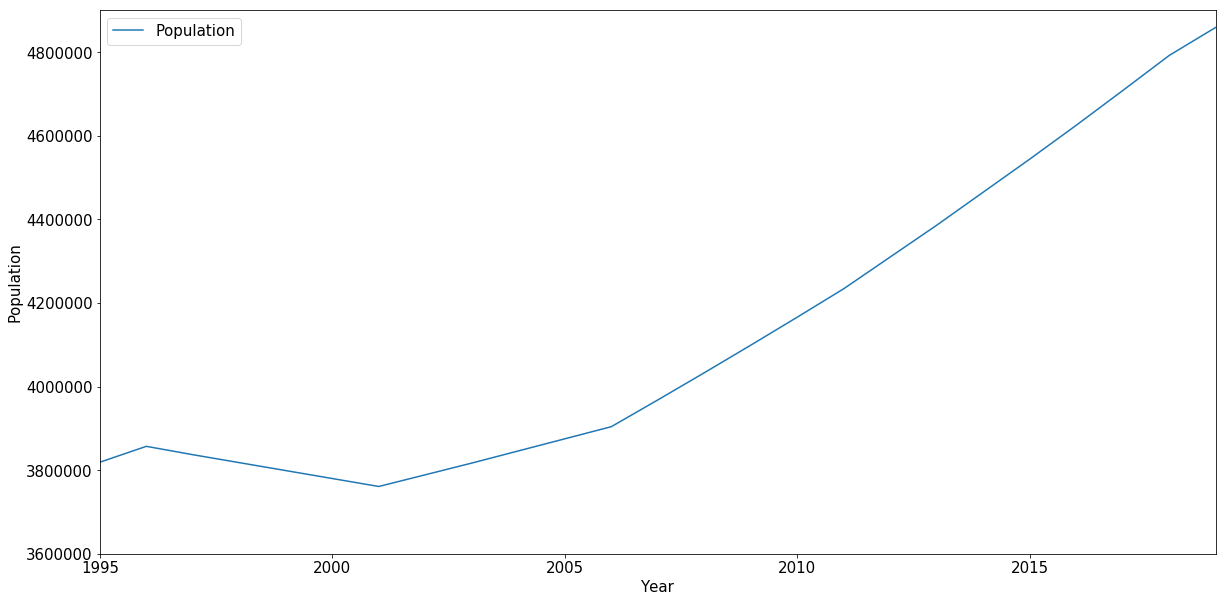

In [57]:
plt.rcParams.update({'font.size': 15})
pop.plot(x="Year", y="Population", kind="line",figsize =(20,10),ylim =(3600000,4900000))
plt.xlabel('Year')
plt.ylabel('Population')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

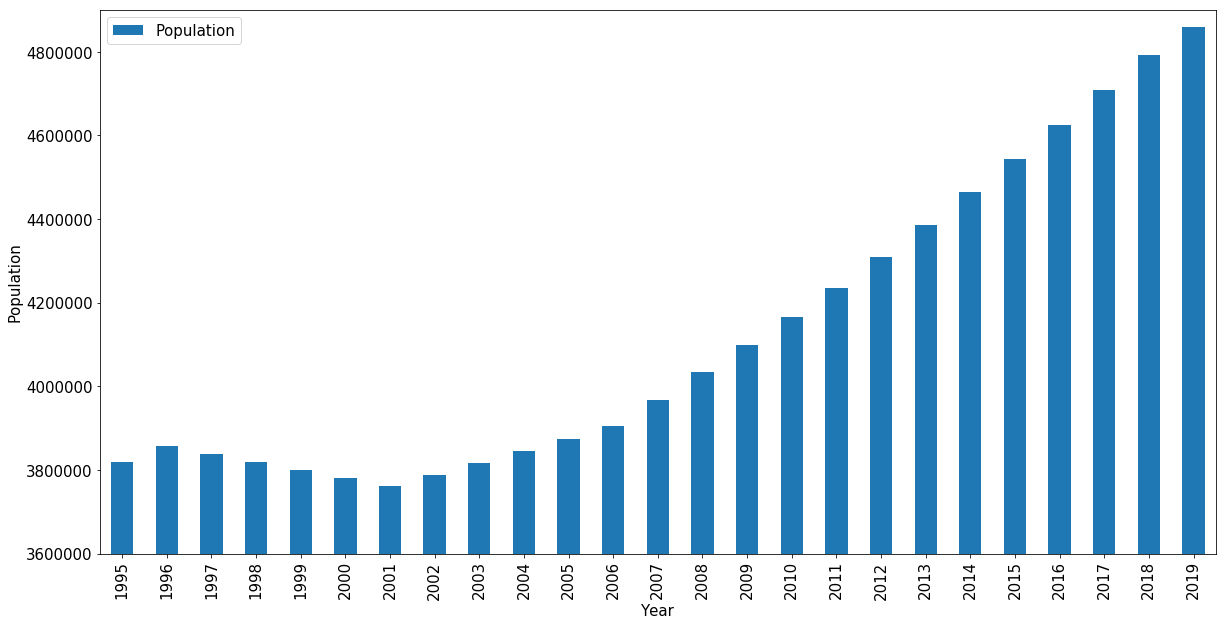

In [58]:
plt.rcParams.update({'font.size': 15})
pop.plot(x="Year", y="Population", kind="bar",figsize =(20,10),ylim =(3600000,4900000))
plt.xlabel('Year')
plt.ylabel('Population')
plt.show

In [59]:
dem= pd.read_csv(r'C:\Users\admin\Documents\demo.csv')
dem.head()

,Country,Number
0,Afghanistan,7287
1,Australia,1219980
2,Bangladesh,12911
3,Bosnia and Herzegovina,3067
4,Cambodia,5343


In [60]:
imt= dem.drop([1])
imm = imt.sort_values(by='Number', ascending = False)
imm = imm.head(5)
imm.rename(columns ={'Country ':'Country'},inplace =True)
imm.head()

,Country,Number
7,China,98290
10,England,71195
16,India,69217
24,Lebanon,28675
23,South Korea,22780


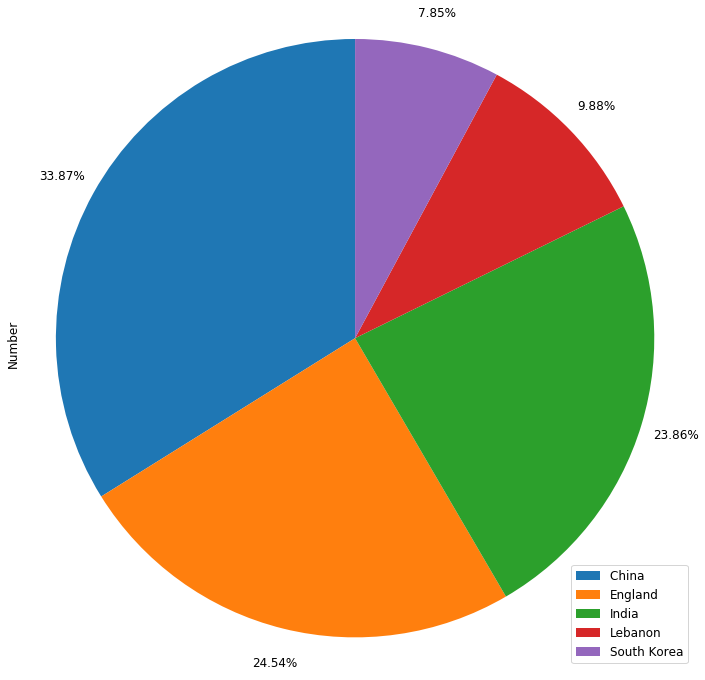

In [61]:
plt.rcParams.update({'font.size': 12})
imm['Number'].plot(kind='pie', figsize=(12, 12), startangle=90, autopct='%1.2f%%',shadow=False, labels=None, pctdistance=1.12)
plt.axis('equal') 
plt.legend(labels=imm.Country, loc='lower right') 
plt.show()

In [62]:
imt['Number'].sum()

506773

In [63]:
data = {'country': ['Australia', 'Overseas'],
        'number': [1219980, 506773]}
ove = pd.DataFrame(data, columns = ['country', 'number'])
ove

,country,number
0,Australia,1219980
1,Overseas,506773


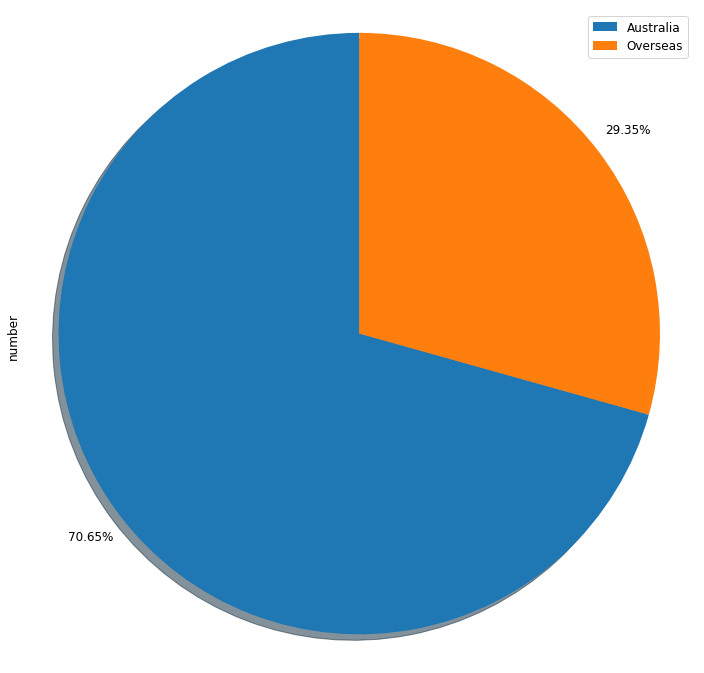

In [64]:
plt.rcParams.update({'font.size': 12})
ove['number'].plot(kind='pie', figsize=(12, 12), startangle=90, autopct='%1.2f%%',shadow=True, labels=None, pctdistance=1.12)
plt.axis('equal') 
plt.legend(labels=ove.country, loc='upper right') 
plt.show()

In [65]:
syd = pd.read_csv(r'C:\Users\admin\Documents\Australian_Post_Codes_Lat_Lon.csv')

In [66]:
syd.dropna(inplace =True)

In [67]:
nsw = syd[syd['state']== "NSW"]

In [68]:
nsw.state.unique()

array(['NSW'], dtype=object)

In [69]:
nsw = nsw.drop_duplicates(subset=('suburb'))

In [70]:
nsw.shape

(4667, 7)

In [71]:
nsw.head()

,postcode,suburb,state,dc,type,lat,lon
145,1001,SYDNEY,NSW,EAST SUBS MC,LVR,-33.794883,151.268071
288,1210,AUSTRALIA SQUARE,NSW,EAST SUBS MC,LVR,-33.891788,151.176251
297,1219,GROSVENOR PLACE,NSW,GROSVENOR PLACE POST SHOP,LVR,-33.741311,151.034025
302,1224,ROYAL EXCHANGE,NSW,ROYAL EXCHANGE POST SHOP,LVR,-33.865330,151.207905
307,1229,QUEEN VICTORIA BUILDING,NSW,QUEEN VICTORIA BUILD POST SHOP,LVR,-33.871749,151.206708


In [72]:
nsw.drop(columns =['postcode','state','dc','type'],inplace =True)

In [73]:
nsw.head()

,suburb,lat,lon
145,SYDNEY,-33.794883,151.268071
288,AUSTRALIA SQUARE,-33.891788,151.176251
297,GROSVENOR PLACE,-33.741311,151.034025
302,ROYAL EXCHANGE,-33.865330,151.207905
307,QUEEN VICTORIA BUILDING,-33.871749,151.206708


In [74]:
nsw ['suburb'] =nsw['suburb'].str.title()

In [75]:
nsw.head()

,suburb,lat,lon
145,Sydney,-33.794883,151.268071
288,Australia Square,-33.891788,151.176251
297,Grosvenor Place,-33.741311,151.034025
302,Royal Exchange,-33.865330,151.207905
307,Queen Victoria Building,-33.871749,151.206708


In [76]:
nsw.sort_values(by=['suburb'],ascending = True, inplace=True)

In [77]:
nsw.head()

,suburb,lat,lon
5087,Aarons Pass,-32.863277,149.803751
852,Abbotsbury,-33.877538,150.867768
504,Abbotsford,-33.852469,151.129453
4678,Abercrombie River,-33.911806,149.332781
1412,Aberdare,-32.844200,151.376514


In [78]:
nsw.rename(columns ={'suburb':'Suburb'},inplace = True)

In [79]:
dfx = df[['Suburb','total']]
dfx.head()

,Suburb,total
0,Aarons Pass,0
1,Aarons Pass,0
2,Aarons Pass,0
3,Aarons Pass,0
4,Aarons Pass,5


In [80]:
df[['Suburb','total']].head()

,Suburb,total
0,Aarons Pass,0
1,Aarons Pass,0
2,Aarons Pass,0
3,Aarons Pass,0
4,Aarons Pass,5


In [81]:
df1 = pd.DataFrame(dfx.groupby('Suburb').sum()).reset_index()
df1

,Suburb,total
0,Aarons Pass,80
1,Abbotsbury,3715
2,Abbotsford,6009
3,Abercrombie,597
4,Abercrombie River,82
5,Aberdare,5857
6,Aberdeen,3409
7,Aberfoyle,38
8,Aberglasslyn,2827
9,Abermain,3791


In [82]:
cnsw = pd.merge(nsw,df1, on = 'Suburb')
cnsw.head()

,Suburb,lat,lon,total
0,Aarons Pass,-32.863277,149.803751,80
1,Abbotsbury,-33.877538,150.867768,3715
2,Abbotsford,-33.852469,151.129453,6009
3,Abercrombie River,-33.911806,149.332781,82
4,Aberdare,-32.844200,151.376514,5857


In [83]:
import folium
from geopy.geocoders import Nominatim
from IPython.display import display
import vincent, json

In [84]:
cnsw.dropna(inplace = True)

In [85]:
cnsw.shape

(4146, 4)

In [86]:
cnsw.columns

Index(['Suburb', 'lat', 'lon', 'total'], dtype='object')

In [87]:
syd = cnsw[cnsw['lon'].between( 150.65967,152.3197)]

In [88]:
syd = syd[(syd['lat'] >= -34.064999) & (syd['lat'] <= -33.581778)]

In [89]:
add = 'Sydney Australia'
geolocator = Nominatim(user_agent = 'syd_explorer')
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude
print(latitude,longitude)

-33.8548157 151.2164539


In [90]:
nsw_map = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, sub, total  in zip(syd['lat'], syd['lon'], syd['Suburb'],syd['total']):
    my_string = '{}  {}'.format(sub, total)
    label = folium.Popup(my_string)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False,).add_to(nsw_map)  

nsw_map

In [91]:
syd.sort_values('total',ascending=True)

,Suburb,lat,lon,total
319,Billeroy,-33.752204,150.967368,2
1352,Eurimbla,-33.918741,151.236993,4
2508,Morning Bay,-33.623044,151.281623,12
3492,The Angle,-34.058994,150.835136,20
535,Broadway,-33.884366,151.196502,27
1617,Great Mackerel Beach,-33.591729,151.300451,33
2974,Pitt Town Bottoms,-33.596291,150.841424,93
1304,Elvina Bay,-33.642011,151.276109,94
3218,Scheyville,-33.610690,150.880310,98
998,Cornwallis,-33.592375,150.812216,106


In [92]:
import json
import requests
from sklearn.cluster import KMeans

In [93]:
CLIENT_ID ='*************************************************' 
CLIENT_SECRET ='*********************************************' 
VERSION = 20200427 
limit = 500
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XG5RKT0HCIMGCCMGTJ3E2WTYIP3D5DF1QJKT3FGQWE1J02P4&client_secret=ILFXHIVSBKQINFV5QOL3ZXX3Y43LWITJSDTAMTNTJNWSH02F&v=20200427&ll=-33.8548157,151.2164539&radius=1000&limit=500'

res= requests.get(url).json()
res

In [94]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
      
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

sydv = getNearbyVenues(names = syd['Suburb'], latitudes = syd['lat'], longitudes = syd['lon'])

In [95]:
sydv =pd.read_csv(r'C:\Users\admin\Documents\sydven.csv')
sydv

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,0,0,0,Abbotsbury,-33.877538,150.867768,7-Eleven,-33.883210,150.865553,Convenience Store
1,1,1,1,1,Abbotsbury,-33.877538,150.867768,Coles,-33.876304,150.876703,Supermarket
2,2,2,2,2,Abbotsbury,-33.877538,150.867768,Sydney united sports centre,-33.875559,150.874182,Athletics & Sports
3,3,3,3,3,Abbotsbury,-33.877538,150.867768,Stockdale Reserve,-33.871098,150.868060,Park
4,4,4,4,4,Abbotsbury,-33.877538,150.867768,Edensor Park Plaza,-33.876362,150.876681,Shopping Mall
5,5,5,5,5,Abbotsbury,-33.877538,150.867768,Treetop Adventure Park,-33.880150,150.859200,Other Great Outdoors
6,6,6,6,6,Abbotsbury,-33.877538,150.867768,Edensor Park Continental Deli,-33.876260,150.876800,Deli / Bodega
7,7,7,7,7,Abbotsbury,-33.877538,150.867768,Western Sydney Parklands (Plough & Harrow West),-33.881966,150.859439,Park
8,8,8,8,8,Abbotsbury,-33.877538,150.867768,Abbotsbury Shops,-33.869554,150.865294,Convenience Store
9,9,9,9,9,Abbotsbury,-33.877538,150.867768,Plough and Harrow,-33.881878,150.859155,Other Great Outdoors


In [96]:
sydv.shape

(12271, 11)

In [97]:
sydv.to_csv(r'C:\Users\admin\Documents\sydven.csv', header=True, index=True) 

In [98]:
vencat = sydv.groupby ('Venue Category').count( ).reset_index ( )

In [99]:
vencat = vencat.sort_values(by='Venue',ascending=False)
vencat = vencat.head(15)
vencat

,Venue Category,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude
63,Café,1725,1725,1725,1725,1725,1725,1725,1725,1725,1725
251,Park,624,624,624,624,624,624,624,624,624,624
262,Pizza Place,378,378,378,378,378,378,378,378,378,378
121,Fast Food Restaurant,353,353,353,353,353,353,353,353,353,353
274,Pub,335,335,335,335,335,335,335,335,335,335
81,Coffee Shop,319,319,319,319,319,319,319,319,319,319
336,Thai Restaurant,312,312,312,312,312,312,312,312,312,312
187,Italian Restaurant,302,302,302,302,302,302,302,302,302,302
24,Bakery,300,300,300,300,300,300,300,300,300,300
154,Grocery Store,265,265,265,265,265,265,265,265,265,265


In [100]:
sydv['Venue Category'].value_counts()

Café                               1725
Park                                624
Pizza Place                         378
Fast Food Restaurant                353
Pub                                 335
Coffee Shop                         319
Thai Restaurant                     312
Italian Restaurant                  302
Bakery                              300
Grocery Store                       265
Supermarket                         240
Japanese Restaurant                 239
Chinese Restaurant                  227
Bar                                 217
Shopping Mall                       204
Gym                                 197
Sandwich Place                      161
Convenience Store                   158
Australian Restaurant               156
Burger Joint                        134
Vietnamese Restaurant               133
Seafood Restaurant                  123
Liquor Store                        121
Train Station                       121
Indian Restaurant                   111


<function matplotlib.pyplot.show(*args, **kw)>

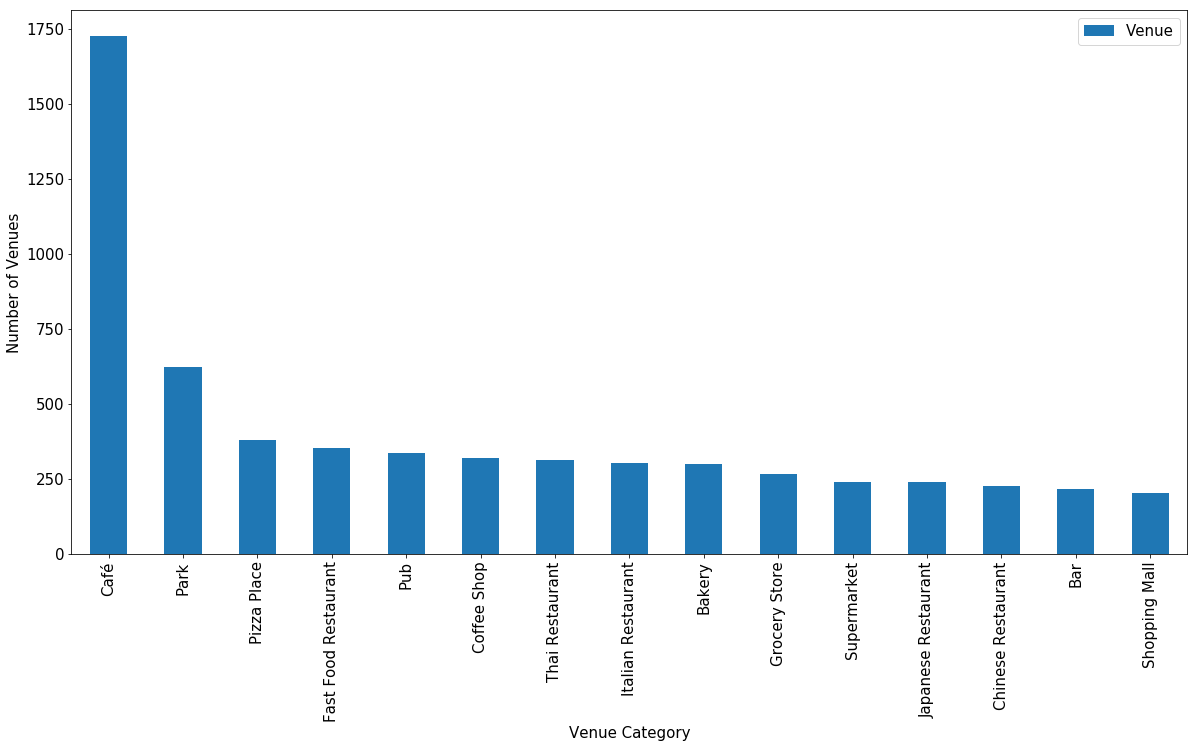

In [101]:
plt.rcParams.update({'font.size': 15})
vencat.plot(x="Venue Category", y=["Venue"], kind="bar", figsize =(20,10))
plt.ylabel('Number of Venues')
plt.show

In [102]:
plt.rcParams.update({'font.size': 15})
subcount = sydv.groupby ('Suburb').count( ).reset_index ( )
subcount = subcount.sort_values(by='Venue',ascending=False)
subcount

,Suburb,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
278,Kirribilli,100,100,100,100,100,100,100,100,100,100
201,Forest Lodge,100,100,100,100,100,100,100,100,100,100
492,Surry Hills,100,100,100,100,100,100,100,100,100,100
75,Broadway,100,100,100,100,100,100,100,100,100,100
458,Rushcutters Bay,100,100,100,100,100,100,100,100,100,100
112,Chippendale,100,100,100,100,100,100,100,100,100,100
435,Redfern,100,100,100,100,100,100,100,100,100,100
150,Darlinghurst,100,100,100,100,100,100,100,100,100,100
152,Dawes Point,100,100,100,100,100,100,100,100,100,100
427,Pyrmont,100,100,100,100,100,100,100,100,100,100


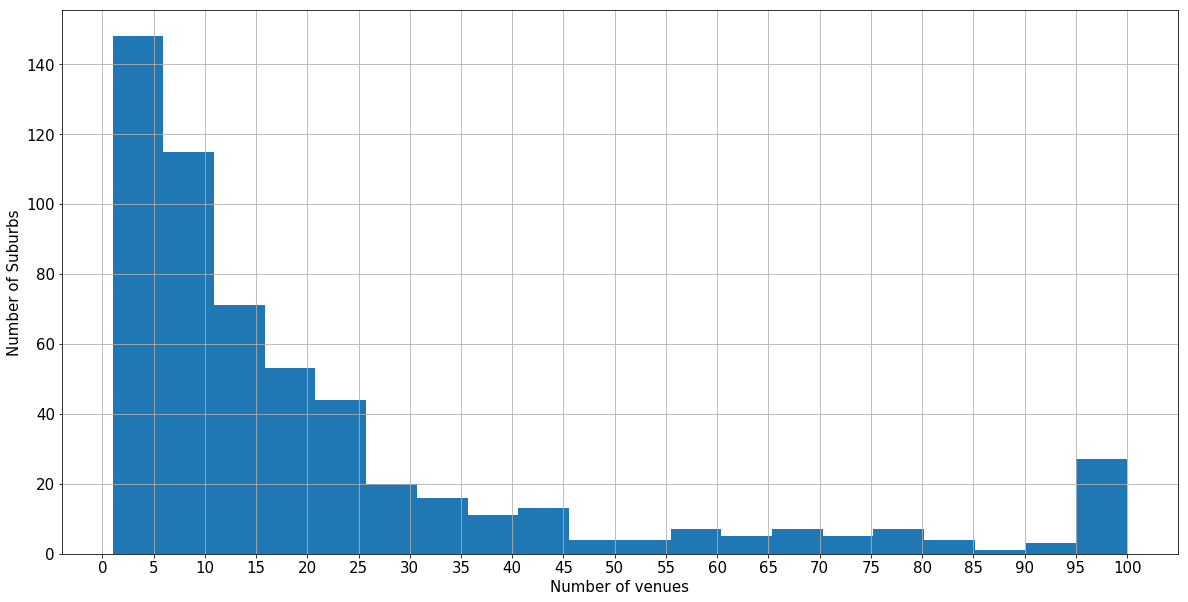

In [103]:
subcount['Venue'].hist(bins=20,figsize =(20,10))
plt.xlabel("Number of venues")
plt.ylabel("Number of Suburbs")
plt.xticks(np.arange(0, 105, 5.0))
plt.show()

In [104]:
len(subcount)

565

In [105]:
len(sydv['Venue Category'].unique())

368

In [106]:
moh = pd.get_dummies(sydv[['Venue Category']], prefix ='',prefix_sep ='')
moh['Suburb'] = sydv['Suburb']
fc =[moh.columns[-1]] + list(moh.columns[:-1])
moh = moh[fc]
moh.head()

,Suburb,Accessories Store,Advertising Agency,Afghan Restaurant,Airport,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
moh.shape

(12271, 369)

In [108]:
subcat = moh.groupby('Suburb').mean().reset_index()
subcat

,Suburb,Accessories Store,Advertising Agency,Afghan Restaurant,Airport,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Abbotsbury,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0
1,Abbotsford,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.050000,0.00,0.0,0.00,0.0
2,Acacia Gardens,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0
3,Agnes Banks,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0
4,Alexandria,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0
5,Alfords Point,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0
6,Allambie Heights,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0
7,Allawah,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.052632,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0
8,Annandale,0.0,0.0,0.0,0.0,0.010638,0.0,0.000000,0.0,0.0,...,0.010638,0.0,0.0,0.0,0.000000,0.010638,0.00,0.0,0.00,0.0
9,Annangrove,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0


In [109]:
ntv =10
for burb in subcat['Suburb']:
    print('----'+burb+'----')
    temp = subcat[subcat['Suburb'] == burb].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop =True).head(ntv))
    print('\n')

----Abbotsbury----
                  venue  freq
0                  Park  0.17
1     Convenience Store  0.17
2  Other Great Outdoors  0.17
3         Shopping Mall  0.08
4    Athletics & Sports  0.08
5           Supermarket  0.08
6    Italian Restaurant  0.08
7         Garden Center  0.08
8         Deli / Bodega  0.08
9       Nature Preserve  0.00


----Abbotsford----
                   venue  freq
0                   Café  0.20
1     Italian Restaurant  0.10
2        Thai Restaurant  0.10
3  Australian Restaurant  0.05
4            Sports Club  0.05
5              Gift Shop  0.05
6          Grocery Store  0.05
7                    Gym  0.05
8          Big Box Store  0.05
9                   Park  0.05


----Acacia Gardens----
                  venue  freq
0           Pizza Place  0.14
1  Fast Food Restaurant  0.14
2        Sandwich Place  0.07
3         Shopping Mall  0.07
4       Thai Restaurant  0.07
5                   Gym  0.07
6         Grocery Store  0.07
7             Pet Store 

                 venue  freq
0                 Café  0.23
1                  Pub  0.09
2                  Bar  0.05
3     Sushi Restaurant  0.04
4   Seafood Restaurant  0.03
5                 Park  0.03
6      Thai Restaurant  0.03
7          Pizza Place  0.03
8  Japanese Restaurant  0.02
9   Italian Restaurant  0.02


----Balmain East----
                venue  freq
0                Café  0.21
1                Park  0.19
2                 Pub  0.11
3                 Bar  0.06
4      Breakfast Spot  0.02
5  Seafood Restaurant  0.02
6     Harbor / Marina  0.02
7       Boat or Ferry  0.02
8    Sushi Restaurant  0.02
9                 Gym  0.02


----Bangor----
                  venue  freq
0                   Pub  0.25
1         Shopping Mall  0.25
2          Burger Joint  0.25
3       Thai Restaurant  0.25
4          Optical Shop  0.00
5  Pakistani Restaurant  0.00
6       Paintball Field  0.00
7          Outlet Store  0.00
8     Other Repair Shop  0.00
9       Other Nightlife  0.00


-

                       venue  freq
0                       Park  0.25
1                Supermarket  0.08
2  Middle Eastern Restaurant  0.08
3                Coffee Shop  0.08
4           Asian Restaurant  0.08
5          Korean Restaurant  0.08
6                        Pub  0.08
7           Video Game Store  0.08
8                     Garden  0.08
9             Cosmetics Shop  0.08


----Berkshire Park----
                           venue  freq
0                      Pet Store   0.5
1                           Pool   0.5
2              Accessories Store   0.0
3                   Optical Shop   0.0
4  Paper / Office Supplies Store   0.0
5           Pakistani Restaurant   0.0
6                Paintball Field   0.0
7                   Outlet Store   0.0
8              Other Repair Shop   0.0
9                Other Nightlife   0.0


----Berowra----
                  venue  freq
0              Platform  0.15
1          Soccer Field  0.08
2  Fast Food Restaurant  0.08
3                Bakery

                  venue  freq
0  Fast Food Restaurant  0.10
1           Pizza Place  0.10
2           Supermarket  0.10
3            Food Truck  0.05
4  Other Great Outdoors  0.05
5     Food & Drink Shop  0.05
6                  Café  0.05
7         Grocery Store  0.05
8         Shopping Mall  0.05
9  Gym / Fitness Center  0.05


----Bonnyrigg Heights----
                  venue  freq
0            Sports Bar  0.50
1         Garden Center  0.25
2                  Café  0.25
3     Accessories Store  0.00
4          Optical Shop  0.00
5  Pakistani Restaurant  0.00
6       Paintball Field  0.00
7          Outlet Store  0.00
8     Other Repair Shop  0.00
9       Other Nightlife  0.00


----Bossley Park----
                           venue  freq
0                  Grocery Store  0.22
1                            Bar  0.11
2             Italian Restaurant  0.11
3                           Park  0.11
4                         Buffet  0.11
5                            Gym  0.11
6               

              venue  freq
0              Café  0.10
1  Malay Restaurant  0.10
2  Department Store  0.05
3      Liquor Store  0.05
4  Football Stadium  0.05
5    Shopping Plaza  0.05
6     Shopping Mall  0.05
7  Sushi Restaurant  0.05
8     Grocery Store  0.05
9               Gym  0.05


----Canada Bay----
                  venue  freq
0                   Gym  0.11
1                  Park  0.11
2               Brewery  0.06
3    Athletics & Sports  0.06
4         Souvlaki Shop  0.06
5      Football Stadium  0.06
6           Golf Course  0.06
7         Boat or Ferry  0.06
8                  Café  0.06
9  Gym / Fitness Center  0.06


----Canley Heights----
                       venue  freq
0      Vietnamese Restaurant  0.28
1                       Café  0.08
2               Dessert Shop  0.08
3                        Pub  0.04
4  Middle Eastern Restaurant  0.04
5         Chinese Restaurant  0.04
6           Tapas Restaurant  0.04
7                        Bar  0.04
8                      

9           Pakistani Restaurant  0.00


----Chippendale----
              venue  freq
0              Café  0.16
1       Coffee Shop  0.08
2               Bar  0.08
3   Thai Restaurant  0.06
4               Pub  0.04
5            Bakery  0.03
6    Ice Cream Shop  0.03
7      Cocktail Bar  0.03
8            Hostel  0.02
9  Ramen Restaurant  0.02


----Chipping Norton----
                venue  freq
0                Park  0.22
1       Shopping Mall  0.11
2         Supermarket  0.11
3    Business Service  0.11
4                Café  0.11
5     Thai Restaurant  0.11
6       Grocery Store  0.11
7  Italian Restaurant  0.11
8          Poke Place  0.00
9   Polish Restaurant  0.00


----Chiswick----
                venue  freq
0                Café  0.29
1  Italian Restaurant  0.12
2     Thai Restaurant  0.12
3                Park  0.12
4        Burger Joint  0.06
5           Gift Shop  0.06
6       Grocery Store  0.06
7           Wine Shop  0.06
8         Pizza Place  0.06
9                Pie

                           venue  freq
0                 Scenic Lookout  0.33
1                           Park  0.33
2                  Boat or Ferry  0.33
3                   Optical Shop  0.00
4  Paper / Office Supplies Store  0.00
5           Pakistani Restaurant  0.00
6                Paintball Field  0.00
7                   Outlet Store  0.00
8              Other Repair Shop  0.00
9                Other Nightlife  0.00


----Coogee----
                venue  freq
0                Café  0.19
1               Hotel  0.07
2                Park  0.07
3               Beach  0.05
4                 Bar  0.05
5   Fish & Chips Shop  0.03
6   French Restaurant  0.03
7  Italian Restaurant  0.03
8     Thai Restaurant  0.03
9         Pizza Place  0.03


----Cottage Point----
                           venue  freq
0                Harbor / Marina  0.25
1                   Neighborhood  0.25
2                   Home Service  0.25
3                           Café  0.25
4              Accessories 

                   venue  freq
0     Chinese Restaurant  0.30
1      Korean Restaurant  0.14
2    Japanese Restaurant  0.08
3  Vietnamese Restaurant  0.08
4       Asian Restaurant  0.05
5                    Pub  0.05
6        Thai Restaurant  0.03
7          Grocery Store  0.03
8              BBQ Joint  0.03
9                   Café  0.03


----Denistone East----
                           venue  freq
0                           Park  0.25
1                  Deli / Bodega  0.25
2                   Burger Joint  0.25
3                   Liquor Store  0.25
4              Accessories Store  0.00
5                Organic Grocery  0.00
6  Paper / Office Supplies Store  0.00
7           Pakistani Restaurant  0.00
8                Paintball Field  0.00
9                   Outlet Store  0.00


----Denistone West----
                  venue  freq
0  Fast Food Restaurant   0.2
1           Golf Course   0.1
2                 Motel   0.1
3             Pet Store   0.1
4    Chinese Restaurant   0.1


                           venue  freq
0                           Park  0.17
1             Athletics & Sports  0.17
2                  Deli / Bodega  0.17
3                    Supermarket  0.17
4                  Shopping Mall  0.17
5           Other Great Outdoors  0.17
6  Paper / Office Supplies Store  0.00
7           Pakistani Restaurant  0.00
8                Paintball Field  0.00
9                   Outlet Store  0.00


----Edgecliff----
                   venue  freq
0                   Café  0.23
1     Italian Restaurant  0.08
2                   Park  0.06
3                    Bar  0.06
4  Australian Restaurant  0.04
5    Japanese Restaurant  0.04
6                    Pub  0.04
7                 Bakery  0.03
8            Supermarket  0.03
9             Restaurant  0.03


----Elanora Heights----
                  venue  freq
0           Pizza Place  0.17
1         Shopping Mall  0.17
2                   Gym  0.17
3         Grocery Store  0.17
4                  Café  0.17
5   

                  venue  freq
0                  Park   0.2
1           Pizza Place   0.2
2            Sports Bar   0.1
3   Japanese Restaurant   0.1
4         Shopping Mall   0.1
5           Supermarket   0.1
6         Auto Workshop   0.1
7          Liquor Store   0.1
8       Organic Grocery   0.0
9  Pakistani Restaurant   0.0


----Frenchs Forest----
                venue  freq
0                Café  0.27
1   Indian Restaurant  0.13
2  Athletics & Sports  0.07
3     Other Nightlife  0.07
4              Bakery  0.07
5         Bus Station  0.07
6               Trail  0.07
7       Shopping Mall  0.07
8     Thai Restaurant  0.07
9         Golf Course  0.07


----Galston----
                  venue  freq
0                  Café  0.27
1                  Park  0.09
2            Skate Park  0.09
3                   Pub  0.09
4              Gym Pool  0.09
5     Electronics Store  0.09
6         Shopping Mall  0.09
7         Grocery Store  0.09
8          Liquor Store  0.09
9  Pakistani Restau

                           venue  freq
0                           Café  0.36
1                           Park  0.21
2             Seafood Restaurant  0.07
3              Electronics Store  0.07
4                  Train Station  0.07
5                      Pet Store  0.07
6                  Grocery Store  0.07
7                           Pier  0.07
8  Paper / Office Supplies Store  0.00
9           Pakistani Restaurant  0.00


----Greystanes----
               venue  freq
0                Pub  0.25
1        Supermarket  0.25
2      Shopping Mall  0.25
3        Video Store  0.25
4  Accessories Store  0.00
5        Opera House  0.00
6    Paintball Field  0.00
7       Outlet Store  0.00
8  Other Repair Shop  0.00
9    Other Nightlife  0.00


----Grose Wold----
                           venue  freq
0                           Park   1.0
1              Accessories Store   0.0
2                   Optical Shop   0.0
3  Paper / Office Supplies Store   0.0
4           Pakistani Restaurant   0.

                       venue  freq
0      Vietnamese Restaurant  0.29
1               Night Market  0.04
2          Indian Restaurant  0.04
3  Middle Eastern Restaurant  0.04
4                Fish Market  0.04
5             Farmers Market  0.04
6                Flea Market  0.04
7                Flower Shop  0.04
8                     Bakery  0.04
9              Train Station  0.04


----Horningsea Park----
                  venue  freq
0  Fast Food Restaurant  0.17
1           Supermarket  0.17
2         Shopping Mall  0.08
3                  Café  0.08
4          Home Service  0.08
5           Flea Market  0.08
6          Liquor Store  0.08
7           Coffee Shop  0.08
8           Pizza Place  0.08
9      Department Store  0.08


----Hornsby----
                  venue  freq
0                  Café  0.16
1                   Gym  0.05
2  Fast Food Restaurant  0.05
3     Korean Restaurant  0.04
4      Asian Restaurant  0.04
5                Bakery  0.04
6         Movie Theater  0.04
7

                           venue  freq
0                    Gas Station   1.0
1              Accessories Store   0.0
2                   Optical Shop   0.0
3                           Park   0.0
4  Paper / Office Supplies Store   0.0
5           Pakistani Restaurant   0.0
6                Paintball Field   0.0
7                   Outlet Store   0.0
8              Other Repair Shop   0.0
9                Other Nightlife   0.0


----Kensington----
                  venue  freq
0                  Café  0.21
1           Pizza Place  0.09
2                Bakery  0.08
3    Italian Restaurant  0.06
4                   Pub  0.05
5           Coffee Shop  0.05
6              Platform  0.03
7  Fast Food Restaurant  0.03
8        Farmers Market  0.03
9         Grocery Store  0.03


----Kenthurst----
                           venue  freq
0                           Café   0.5
1                    Pizza Place   0.5
2              Accessories Store   0.0
3                Organic Grocery   0.0
4  Pa

                           venue  freq
0             Italian Restaurant  0.14
1                     Food Truck  0.14
2             Chinese Restaurant  0.14
3                    Gas Station  0.14
4           Fast Food Restaurant  0.14
5                            Gym  0.14
6                         Lounge  0.14
7              Other Repair Shop  0.00
8                           Park  0.00
9  Paper / Office Supplies Store  0.00


----Lavender Bay----
                 venue  freq
0                 Café  0.27
1                 Park  0.07
2                  Bar  0.06
3          Coffee Shop  0.06
4  Japanese Restaurant  0.04
5   Italian Restaurant  0.04
6               Bakery  0.03
7            Juice Bar  0.03
8                  Gym  0.03
9         Burger Joint  0.02


----Leichhardt----
                venue  freq
0                Café  0.21
1  Italian Restaurant  0.13
2                 Pub  0.06
3         Pizza Place  0.03
4         Supermarket  0.03
5     Thai Restaurant  0.03
6           

               venue  freq
0               Park  0.12
1               Café  0.12
2     Sandwich Place  0.06
3             Bistro  0.06
4              Hotel  0.06
5   Malay Restaurant  0.06
6     Clothing Store  0.06
7                Gym  0.06
8  Convenience Store  0.06
9   Greek Restaurant  0.06


----Malabar----
                  venue  freq
0           Bus Station  0.15
1                  Café  0.15
2            Restaurant  0.08
3   Fried Chicken Joint  0.08
4                 Beach  0.08
5  Other Great Outdoors  0.08
6                  Pier  0.08
7           Pizza Place  0.08
8           Golf Course  0.08
9                  Park  0.08


----Manly Vale----
                    venue  freq
0                    Park  0.29
1             Golf Course  0.14
2    Fast Food Restaurant  0.07
3     Sporting Goods Shop  0.07
4             Supermarket  0.07
5           Shopping Mall  0.07
6               Pet Store  0.07
7                    Café  0.07
8            Liquor Store  0.07
9  Furniture /

                           venue  freq
0           Fast Food Restaurant   0.2
1  Paper / Office Supplies Store   0.1
2         Thrift / Vintage Store   0.1
3           Gym / Fitness Center   0.1
4                  Shopping Mall   0.1
5                  Grocery Store   0.1
6                           Café   0.1
7            Sporting Goods Shop   0.1
8              Convenience Store   0.1
9                   Noodle House   0.0


----Minto----
                  venue  freq
0  Fast Food Restaurant   0.3
1        Sandwich Place   0.1
2     Convenience Store   0.1
3      Basketball Court   0.1
4         Shopping Mall   0.1
5         Grocery Store   0.1
6        Farmers Market   0.1
7      Department Store   0.1
8          Noodle House   0.0
9                Office   0.0


----Minto Heights----
                           venue  freq
0               Business Service   1.0
1              Accessories Store   0.0
2                Organic Grocery   0.0
3                           Park   0.0
4  Pap

                           venue  freq
0                           Lake   0.5
1                           Pool   0.5
2                   Optical Shop   0.0
3                           Park   0.0
4  Paper / Office Supplies Store   0.0
5           Pakistani Restaurant   0.0
6                Paintball Field   0.0
7                   Outlet Store   0.0
8              Other Repair Shop   0.0
9                Other Nightlife   0.0


----Naremburn----
                   venue  freq
0                   Café  0.22
1            Coffee Shop  0.09
2        Thai Restaurant  0.04
3     Italian Restaurant  0.04
4  Vietnamese Restaurant  0.04
5       Sushi Restaurant  0.03
6                    Gym  0.03
7         Sandwich Place  0.03
8   Gym / Fitness Center  0.02
9                    Bar  0.02


----Narrabeen----
                  venue  freq
0         Grocery Store  0.33
1                  Park  0.33
2   Sporting Goods Shop  0.17
3                 Beach  0.17
4     Accessories Store  0.00
5       Or

                  venue  freq
0   Fried Chicken Joint  0.07
1          Liquor Store  0.07
2                  Park  0.07
3           Coffee Shop  0.07
4             Multiplex  0.04
5            Steakhouse  0.04
6             Gift Shop  0.04
7           Supermarket  0.04
8            Restaurant  0.04
9  Cantonese Restaurant  0.04


----North Turramurra----
                   venue  freq
0     Italian Restaurant   0.2
1            Sports Club   0.1
2  Australian Restaurant   0.1
3          Historic Site   0.1
4     Chinese Restaurant   0.1
5        Thai Restaurant   0.1
6          Grocery Store   0.1
7      Food & Drink Shop   0.1
8           Liquor Store   0.1
9   Pakistani Restaurant   0.0


----North Wahroonga----
                           venue  freq
0                   Soccer Field  0.29
1                    Rugby Pitch  0.14
2            Arts & Crafts Store  0.14
3                      Gift Shop  0.14
4                 Scenic Lookout  0.14
5             Athletics & Sports  0.14
6  

                       venue  freq
0                Bus Station  0.17
1  Middle Eastern Restaurant  0.08
2       Fast Food Restaurant  0.08
3           Department Store  0.08
4                Supermarket  0.08
5         Chinese Restaurant  0.08
6             Shopping Plaza  0.08
7         Photography Studio  0.08
8                       Park  0.08
9                Pizza Place  0.08


----Parramatta----
                  venue  freq
0                  Café  0.17
1           Pizza Place  0.08
2                Bakery  0.08
3    Italian Restaurant  0.06
4                   Pub  0.05
5   Japanese Restaurant  0.05
6           Coffee Shop  0.05
7           Supermarket  0.03
8        Farmers Market  0.03
9  Fast Food Restaurant  0.03


----Peakhurst----
                           venue  freq
0                           Café  0.33
1                        Exhibit  0.17
2                            Pub  0.17
3              Convenience Store  0.17
4                  Grocery Store  0.17
5         

                    venue  freq
0  Furniture / Home Store  0.25
1     Sporting Goods Shop  0.12
2                    Park  0.12
3              Water Park  0.12
4           Shopping Mall  0.12
5          Sandwich Place  0.12
6             Flower Shop  0.12
7       Accessories Store  0.00
8            Optical Shop  0.00
9         Paintball Field  0.00


----Putney----
                  venue  freq
0                  Café  0.28
1                   Gym  0.11
2    Italian Restaurant  0.06
3              Car Wash  0.06
4  Fast Food Restaurant  0.06
5                  Park  0.06
6              Gym Pool  0.06
7          Tennis Court  0.06
8         Grocery Store  0.06
9           Snack Place  0.06


----Pymble----
                           venue  freq
0                    Coffee Shop  0.17
1                            Pub  0.17
2                  Train Station  0.17
3                    Gas Station  0.17
4                           Café  0.17
5                    Pizza Place  0.17
6          

                           venue  freq
0           Fast Food Restaurant  0.25
1                            Pub  0.17
2  Paper / Office Supplies Store  0.08
3              Electronics Store  0.08
4              Convenience Store  0.08
5                            Gym  0.08
6                Thai Restaurant  0.08
7                   Liquor Store  0.08
8                       Platform  0.08
9                Other Nightlife  0.00


----Rose Bay----
                  venue  freq
0                  Park  0.22
1           Coffee Shop  0.11
2    Seafood Restaurant  0.11
3           Supermarket  0.11
4     Indian Restaurant  0.11
5                  Café  0.11
6      Sushi Restaurant  0.11
7  Hungarian Restaurant  0.11
8     Accessories Store  0.00
9  Pakistani Restaurant  0.00


----Rosehill----
                 venue  freq
0                Hotel  0.16
1          Supermarket  0.11
2        Train Station  0.11
3                 Café  0.11
4       Sandwich Place  0.11
5  American Restaurant  0.05


9       Shopping Mall  0.05


----Sefton----
                  venue  freq
0    Falafel Restaurant  0.14
1          Soccer Field  0.14
2         Bowling Green  0.14
3                  Pool  0.14
4         Train Station  0.14
5                  Café  0.14
6      Sushi Restaurant  0.14
7  Pakistani Restaurant  0.00
8       Paintball Field  0.00
9          Outlet Store  0.00


----Seven Hills----
                           venue  freq
0                   Intersection   0.2
1              Convenience Store   0.2
2                           Park   0.2
3                   Liquor Store   0.2
4                    Bus Station   0.2
5                      Newsstand   0.0
6                Other Nightlife   0.0
7                Nature Preserve   0.0
8  Paper / Office Supplies Store   0.0
9           Pakistani Restaurant   0.0


----Shalvey----
                           venue  freq
0                    Gas Station   0.5
1                    Art Gallery   0.5
2              Accessories Store   0.0


                 venue  freq
0               Bakery  0.17
1      Thai Restaurant  0.17
2          Pizza Place  0.17
3          Sports Club  0.08
4    Indian Restaurant  0.08
5        Grocery Store  0.08
6                 Café  0.08
7   Seafood Restaurant  0.08
8  Japanese Restaurant  0.08
9         Night Market  0.00


----Sydenham----
                   venue  freq
0                   Café  0.24
1                Brewery  0.08
2  Vietnamese Restaurant  0.06
3          Deli / Bodega  0.04
4      Electronics Store  0.04
5               Platform  0.04
6   Fast Food Restaurant  0.04
7                    Gym  0.04
8           Climbing Gym  0.02
9          Grocery Store  0.02


----Sydney----
                 venue  freq
0                 Café  0.24
1                 Park  0.12
2  Japanese Restaurant  0.08
3                Beach  0.08
4          Supermarket  0.08
5         Liquor Store  0.08
6          Golf Course  0.04
7        Shopping Mall  0.04
8   Chinese Restaurant  0.04
9             

                   venue  freq
0                   Café  0.18
1                    Gym  0.09
2      Electronics Store  0.06
3      Indian Restaurant  0.06
4      Korean Restaurant  0.06
5          Movie Theater  0.06
6       Ramen Restaurant  0.03
7    Fried Chicken Joint  0.03
8          Big Box Store  0.03
9  General Entertainment  0.03


----Wakeley----
                 venue  freq
0    Convenience Store  0.18
1               Bakery  0.09
2          Pizza Place  0.09
3  Fried Chicken Joint  0.09
4         Burger Joint  0.09
5        Grocery Store  0.09
6          Flea Market  0.09
7                 Park  0.09
8        Event Service  0.09
9           Sports Bar  0.09


----Wareemba----
                venue  freq
0                Café   0.3
1  Italian Restaurant   0.1
2         Pizza Place   0.1
3   Martial Arts Dojo   0.1
4       Grocery Store   0.1
5     Thai Restaurant   0.1
6                Park   0.1
7   Convenience Store   0.1
8        Noodle House   0.0
9        Outlet Store  

                    venue  freq
0    Fast Food Restaurant  0.14
1           Train Station  0.09
2             Pizza Place  0.09
3                    Park  0.09
4     Lebanese Restaurant  0.09
5      Italian Restaurant  0.05
6  Furniture / Home Store  0.05
7            Night Market  0.05
8             Supermarket  0.05
9           Shopping Mall  0.05


----Willmot----
                           venue  freq
0                 Baseball Field  0.33
1               Basketball Court  0.33
2              Convenience Store  0.33
3           Other Great Outdoors  0.00
4                    Pastry Shop  0.00
5                           Park  0.00
6  Paper / Office Supplies Store  0.00
7           Pakistani Restaurant  0.00
8                Paintball Field  0.00
9                   Outlet Store  0.00


----Willoughby----
                     venue  freq
0                     Café  0.15
1              Pizza Place  0.12
2              Bus Station  0.07
3                      Pub  0.05
4      Japanese

                           venue  freq
0                       Platform   0.4
1                  Train Station   0.2
2     Construction & Landscaping   0.2
3                           Café   0.2
4              Accessories Store   0.0
5                           Park   0.0
6  Paper / Office Supplies Store   0.0
7           Pakistani Restaurant   0.0
8                Paintball Field   0.0
9                   Outlet Store   0.0


----Yowie Bay----
                           venue  freq
0                            Spa  0.25
1                   Home Service  0.25
2              Food & Drink Shop  0.25
3                           Café  0.25
4              Accessories Store  0.00
5                Organic Grocery  0.00
6  Paper / Office Supplies Store  0.00
7           Pakistani Restaurant  0.00
8                Paintball Field  0.00
9                   Outlet Store  0.00


----Zetland----
                    venue  freq
0                    Café  0.23
1                  Bakery  0.07
2       

In [110]:
def return_most_common_venues(row,ntv):
    rw = row.iloc[1:]
    rws = rw.sort_values(ascending = False)
    return rws.index.values[0:ntv]

In [111]:
ntv = 10
indicators = ['st','nd','rd']
columns = ['Suburb']
for ind in np.arange(ntv):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
mcv = pd.DataFrame(columns = columns)
mcv['Suburb'] = subcat['Suburb']
for ind in np.arange(subcat.shape[0]):
    mcv.iloc[ind,1] = return_most_common_venues(subcat.iloc[ind,:], ntv)
mcv.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsbury,"[Park, Convenience Store, Other Great Outdoors...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abbotsford,"[Café, Thai Restaurant, Italian Restaurant, Pi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acacia Gardens,"[Fast Food Restaurant, Pizza Place, Convenienc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agnes Banks,"[Home Service, Movie Theater, Campground, Othe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alexandria,"[Park, Pub, Turkish Restaurant, Chinese Restau...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
kcluster = 5
mgc = subcat.drop('Suburb',1)
km = KMeans(n_clusters = kcluster, random_state = 0).fit(mgc)
km.labels_[0:10]

array([0, 4, 1, 1, 0, 1, 4, 1, 4, 1])

In [113]:
mcv.insert(1, 'Cluster Label', km.labels_,allow_duplicates=False)

In [114]:
mo = syd
mo = mo.join(mcv.set_index('Suburb'), on='Suburb')
mo.head() 

,Suburb,lat,lon,total,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Abbotsbury,-33.877538,150.867768,3715,0.0,"[Park, Convenience Store, Other Great Outdoors...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,-33.852469,151.129453,6009,4.0,"[Café, Thai Restaurant, Italian Restaurant, Pi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Acacia Gardens,-33.730077,150.906502,1716,1.0,"[Fast Food Restaurant, Pizza Place, Convenienc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Agnes Banks,-33.618877,150.707372,947,1.0,"[Home Service, Movie Theater, Campground, Othe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Alexandria,-33.711785,151.108248,31276,0.0,"[Park, Pub, Turkish Restaurant, Chinese Restau...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
mo =mo.dropna(subset=['Cluster Label'])

In [116]:
mo.head()

,Suburb,lat,lon,total,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Abbotsbury,-33.877538,150.867768,3715,0.0,"[Park, Convenience Store, Other Great Outdoors...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,-33.852469,151.129453,6009,4.0,"[Café, Thai Restaurant, Italian Restaurant, Pi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Acacia Gardens,-33.730077,150.906502,1716,1.0,"[Fast Food Restaurant, Pizza Place, Convenienc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Agnes Banks,-33.618877,150.707372,947,1.0,"[Home Service, Movie Theater, Campground, Othe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Alexandria,-33.711785,151.108248,31276,0.0,"[Park, Pub, Turkish Restaurant, Chinese Restau...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
mo['Cluster Label'] = mo['Cluster Label'].astype(int)

In [118]:
ms = mo.drop(mo.columns[[6,7,8,9,10,11,12,13,14]], axis=1)
ms

,Suburb,lat,lon,total,Cluster Label,1st Most Common Venue
1,Abbotsbury,-33.877538,150.867768,3715,0,"[Park, Convenience Store, Other Great Outdoors..."
2,Abbotsford,-33.852469,151.129453,6009,4,"[Café, Thai Restaurant, Italian Restaurant, Pi..."
12,Acacia Gardens,-33.730077,150.906502,1716,1,"[Fast Food Restaurant, Pizza Place, Convenienc..."
19,Agnes Banks,-33.618877,150.707372,947,1,"[Home Service, Movie Theater, Campground, Othe..."
28,Alexandria,-33.711785,151.108248,31276,0,"[Park, Pub, Turkish Restaurant, Chinese Restau..."
29,Alfords Point,-33.993303,151.024751,2084,1,"[Construction & Landscaping, Shopping Mall, Pl..."
32,Allambie Heights,-33.765076,151.248864,4183,4,"[Park, Liquor Store, Grocery Store, Café, Bake..."
34,Allawah,-33.970018,151.114517,5098,1,"[Chinese Restaurant, Fast Food Restaurant, Sup..."
54,Annandale,-33.881435,151.170681,18726,4,"[Café, Pub, Park, Grocery Store, Pizza Place, ..."
55,Annangrove,-33.657772,150.943505,938,1,"[Indian Restaurant, Racetrack, Zoo Exhibit, Fi..."


In [119]:
subcount.head()

,Suburb,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
278,Kirribilli,100,100,100,100,100,100,100,100,100,100
201,Forest Lodge,100,100,100,100,100,100,100,100,100,100
492,Surry Hills,100,100,100,100,100,100,100,100,100,100
75,Broadway,100,100,100,100,100,100,100,100,100,100
458,Rushcutters Bay,100,100,100,100,100,100,100,100,100,100


In [120]:
sub = subcount.drop(subcount.columns[[1,2,4,5,6]], axis=1)
sub

,Suburb,Unnamed: 0.1.1,Venue,Venue Latitude,Venue Longitude,Venue Category
278,Kirribilli,100,100,100,100,100
201,Forest Lodge,100,100,100,100,100
492,Surry Hills,100,100,100,100,100
75,Broadway,100,100,100,100,100
458,Rushcutters Bay,100,100,100,100,100
112,Chippendale,100,100,100,100,100
435,Redfern,100,100,100,100,100
150,Darlinghurst,100,100,100,100,100
152,Dawes Point,100,100,100,100,100
427,Pyrmont,100,100,100,100,100


In [121]:
ms = ms.join(sub.set_index('Suburb'), on='Suburb')
ms.head() 

,Suburb,lat,lon,total,Cluster Label,1st Most Common Venue,Unnamed: 0.1.1,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Abbotsbury,-33.877538,150.867768,3715,0,"[Park, Convenience Store, Other Great Outdoors...",12,12,12,12,12
2,Abbotsford,-33.852469,151.129453,6009,4,"[Café, Thai Restaurant, Italian Restaurant, Pi...",20,20,20,20,20
12,Acacia Gardens,-33.730077,150.906502,1716,1,"[Fast Food Restaurant, Pizza Place, Convenienc...",14,14,14,14,14
19,Agnes Banks,-33.618877,150.707372,947,1,"[Home Service, Movie Theater, Campground, Othe...",5,5,5,5,5
28,Alexandria,-33.711785,151.108248,31276,0,"[Park, Pub, Turkish Restaurant, Chinese Restau...",12,12,12,12,12


In [122]:
ms.drop(columns =['Venue Latitude','Venue Longitude'],inplace =True)
ms.head()

,Suburb,lat,lon,total,Cluster Label,1st Most Common Venue,Unnamed: 0.1.1,Venue,Venue Category
1,Abbotsbury,-33.877538,150.867768,3715,0,"[Park, Convenience Store, Other Great Outdoors...",12,12,12
2,Abbotsford,-33.852469,151.129453,6009,4,"[Café, Thai Restaurant, Italian Restaurant, Pi...",20,20,20
12,Acacia Gardens,-33.730077,150.906502,1716,1,"[Fast Food Restaurant, Pizza Place, Convenienc...",14,14,14
19,Agnes Banks,-33.618877,150.707372,947,1,"[Home Service, Movie Theater, Campground, Othe...",5,5,5
28,Alexandria,-33.711785,151.108248,31276,0,"[Park, Pub, Turkish Restaurant, Chinese Restau...",12,12,12


In [123]:
ms.rename(columns ={'1st Most Common Venue':'Most Common Venues','Venue Category':'Total Venues'},inplace =True)
ms.head()

,Suburb,lat,lon,total,Cluster Label,Most Common Venues,Unnamed: 0.1.1,Venue,Total Venues
1,Abbotsbury,-33.877538,150.867768,3715,0,"[Park, Convenience Store, Other Great Outdoors...",12,12,12
2,Abbotsford,-33.852469,151.129453,6009,4,"[Café, Thai Restaurant, Italian Restaurant, Pi...",20,20,20
12,Acacia Gardens,-33.730077,150.906502,1716,1,"[Fast Food Restaurant, Pizza Place, Convenienc...",14,14,14
19,Agnes Banks,-33.618877,150.707372,947,1,"[Home Service, Movie Theater, Campground, Othe...",5,5,5
28,Alexandria,-33.711785,151.108248,31276,0,"[Park, Pub, Turkish Restaurant, Chinese Restau...",12,12,12


In [124]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [125]:
map_c = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kcluster)
ys = [1 + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, total, venue, common in zip(ms['lat'], ms['lon'], ms['Suburb'], ms['Cluster Label'], ms['total'], ms['Total Venues'], ms['Most Common Venues']):
    label = folium.Popup(str(poi) +'\n' + 'Cluster  ' + str(cluster)+ '  Total Crime  ' + str(total) + '  Total Venues  ' + str(venue), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_c)  
    
map_c

In [126]:
c0 =pd.DataFrame(ms.loc[ms['Cluster Label'] == 0, ms.columns[[0] +list(range(5, ms.shape[1]))]])
c0

,Suburb,Most Common Venues,Unnamed: 0.1.1,Venue,Total Venues
1,Abbotsbury,"[Park, Convenience Store, Other Great Outdoors...",12,12,12
28,Alexandria,"[Park, Pub, Turkish Restaurant, Chinese Restau...",12,12,12
80,Arndell Park,"[Zoo Exhibit, Playground, Pub, Dog Run, Park, ...",5,5,5
86,Ashbury,"[Park, Café, Bakery, Pizza Place, Liquor Store...",14,14,14
90,Ashcroft,"[Park, Asian Restaurant, Chinese Restaurant, S...",5,5,5
210,Bayview,"[Park, Dog Run, Boat or Ferry, Golf Course, Ca...",9,9,9
216,Beaumont Hills,"[Pizza Place, Home Service, Grocery Store, Sho...",6,6,6
228,Belfield,"[Park, Pizza Place, Café, Sports Club, BBQ Joi...",15,15,15
270,Berala,"[Park, Video Game Store, Garden, Supermarket, ...",12,12,12
303,Bexley,"[Park, Convenience Store, Platform, Fruit & Ve...",12,12,12


In [127]:
c0.rename(columns={'Most Common Venues':'common'},inplace = True)
c0['common'] = c0['common'].astype(str).str.replace(r'\[|\]|', '')
c0v = c0.common.str.split("'", expand=True)
c0v = pd.get_dummies(c0v, prefix='', prefix_sep='')
c0v = c0v.groupby(c0v.columns, axis=1).sum()
c0v = pd.DataFrame(c0v.sum()).reset_index()
c0v.rename(columns={'index':'Venue',0:'Number'},inplace = True)
c0v.sort_values(by='Number', ascending=False,inplace = True)
c0v

,Venue,Number
2,,606
0,,164
1,\n,130
106,Park,82
43,Exhibit,43
44,Falafel Restaurant,37
42,Event Space,34
26,Café,28
45,Farm,25
47,Fast Food Restaurant,24


In [128]:
c1 =pd.DataFrame(ms.loc[ms['Cluster Label'] == 1, ms.columns[[0] +list(range(5, ms.shape[1]))]])
c1

,Suburb,Most Common Venues,Unnamed: 0.1.1,Venue,Total Venues
12,Acacia Gardens,"[Fast Food Restaurant, Pizza Place, Convenienc...",14,14,14
19,Agnes Banks,"[Home Service, Movie Theater, Campground, Othe...",5,5,5
29,Alfords Point,"[Construction & Landscaping, Shopping Mall, Pl...",4,4,4
34,Allawah,"[Chinese Restaurant, Fast Food Restaurant, Sup...",38,38,38
55,Annangrove,"[Indian Restaurant, Racetrack, Zoo Exhibit, Fi...",2,2,2
65,Arcadia,"[Event Space, Gym, Tennis Court, Lake, Event S...",4,4,4
79,Arncliffe,"[Train Station, Australian Restaurant, Hotel, ...",32,32,32
96,Asquith,"[Sports Club, Supermarket, Train Station, Fast...",7,7,7
99,Auburn,"[Grocery Store, Athletics & Sports, Pool, Café...",9,9,9
102,Austral,"[Martial Arts Dojo, Bowling Green, Shopping Ma...",4,4,4


In [129]:
c1.rename(columns={'Most Common Venues':'common'},inplace = True)
c1['common'] = c1['common'].astype(str).str.replace(r'\[|\]|', '')
c1v = c1.common.str.split("'", expand=True)
c1v = pd.get_dummies(c1v, prefix='', prefix_sep='')
c1v = c1v.groupby(c1v.columns, axis=1).sum()
c1v = pd.DataFrame(c1v.sum()).reset_index()
c1v.rename(columns={'index':'Venue',0:'Number'},inplace = True)
c1v.drop([0],inplace = True)
c1v.sort_values(by='Number', ascending=False,inplace = True)
c1v

,Venue,Number
4,,1836
1,\n,463
74,Fast Food Restaurant,154
43,Café,105
71,Falafel Restaurant,92
70,Exhibit,88
72,Farm,78
192,Shopping Mall,78
168,Pizza Place,73
207,Supermarket,69


In [130]:
c2 = pd.DataFrame(ms.loc[ms['Cluster Label'] == 2, ms.columns[[0] +list(range(5, ms.shape[1]))]])
c2

,Suburb,Most Common Venues,Unnamed: 0.1.1,Venue,Total Venues
1648,Grose Wold,"[Park, Fish & Chips Shop, Event Service, Event...",1,1,1
1746,Heckenberg,"[Park, Movie Theater, Scenic Lookout, Food Tru...",5,5,5
2552,Mount Kuring-Gai,"[Park, Fish & Chips Shop, Event Service, Event...",1,1,1
3218,Scheyville,"[Park, Fish & Chips Shop, Event Service, Event...",2,2,2
3850,Wattle Grove,"[Park, Café, Fish & Chips Shop, Event Space, E...",4,4,4


In [131]:
c2.rename(columns={'Most Common Venues':'common'},inplace = True)
c2['common'] = c2['common'].astype(str).str.replace(r'\[|\]|', '')
c2v = c2.common.str.split("'", expand=True)
c2v = pd.get_dummies(c2v, prefix='', prefix_sep='')
c2v = c2v.groupby(c2v.columns, axis=1).sum()
c2v = pd.DataFrame(c2v.sum()).reset_index()
c2v.rename(columns={'index':'Venue',0:'Number'},inplace = True)
c2v.sort_values(by='Number', ascending=False,inplace = True)

c2v

,Venue,Number
2,,36
0,,10
1,\n,9
16,Park,5
5,Event Space,5
6,Exhibit,5
7,Falafel Restaurant,5
8,Farm,5
11,Field,4
12,Fish & Chips Shop,4


In [132]:
c3 =pd.DataFrame(ms.loc[ms['Cluster Label'] == 3, ms.columns[[0] +list(range(5, ms.shape[1]))]])
c3

,Suburb,Most Common Venues,Unnamed: 0.1.1,Venue,Total Venues
1141,Denham Court,"[Italian Restaurant, Business Service, Gas Sta...",3,3,3
1267,Eastern Creek,"[Bakery, Cafeteria, Gas Station, Bike Rental /...",4,4,4
1942,Kemps Creek,"[Gas Station, Zoo Exhibit, Fish Market, Event ...",1,1,1
2130,Leppington,"[Gas Station, Shopping Mall, Australian Restau...",4,4,4
2132,Lethbridge Park,"[Gas Station, Office, Grocery Store, Fish Mark...",4,4,4
2390,Michelago,"[Pizza Place, Grocery Store, Burger Joint, Gas...",4,4,4
3240,Shalvey,"[Gas Station, Art Gallery, Zoo Exhibit, Fishin...",2,2,2
3464,Telopea,"[Gas Station, Pub, Grocery Store, Train Statio...",7,7,7


In [133]:
c3.rename(columns={'Most Common Venues':'common'},inplace = True)
c3['common'] = c3['common'].astype(str).str.replace(r'\[|\]|', '')
c3v = c3.common.str.split("'", expand=True)
c3v = pd.get_dummies(c3v, prefix='', prefix_sep='')
c3v = c3v.groupby(c3v.columns, axis=1).sum()
c3v = pd.DataFrame(c3v.sum()).reset_index()
c3v.rename(columns={'index':'Venue',0:'Number'},inplace = True)
c3v.drop([1],inplace = True)
c3v.sort_values(by='Number', ascending=False,inplace = True)
c3v

,Venue,Number
2,,57
0,,16
20,Gas Station,8
12,Falafel Restaurant,8
11,Exhibit,7
14,Farmers Market,7
13,Farm,7
15,Fast Food Restaurant,6
16,Field,5
30,Zoo Exhibit,4


In [134]:
c4 = pd.DataFrame(ms.loc[ms['Cluster Label'] == 4, ms.columns[[0] +list(range(5, ms.shape[1]))]])
c4

,Suburb,Most Common Venues,Unnamed: 0.1.1,Venue,Total Venues
2,Abbotsford,"[Café, Thai Restaurant, Italian Restaurant, Pi...",20,20,20
32,Allambie Heights,"[Park, Liquor Store, Grocery Store, Café, Bake...",5,5,5
54,Annandale,"[Café, Pub, Park, Grocery Store, Pizza Place, ...",94,94,94
83,Artarmon,"[Café, Pizza Place, Japanese Restaurant, Thai ...",55,55,55
136,Balgowlah,"[Café, Liquor Store, Park, Shopping Mall, Groc...",29,29,29
137,Balgowlah Heights,"[Café, Park, Beach, Surf Spot, Trail, Golf Cou...",22,22,22
146,Balmain,"[Café, Pub, Bar, Sushi Restaurant, Seafood Res...",91,91,91
147,Balmain East,"[Café, Park, Pub, Bar, Bowling Green, Food Tru...",47,47,47
158,Banksmeadow,"[Café, Sandwich Place, Port, Park, Golf Course...",8,8,8
172,Bardwell Park,"[Café, Gym, Fast Food Restaurant, Pizza Place,...",17,17,17


In [135]:
c4.rename(columns={'Most Common Venues':'common'},inplace = True)
c4['common'] = c4['common'].astype(str).str.replace(r'\[|\]|', '')
c4v = c4.common.str.split("'", expand=True)
c4v = pd.get_dummies(c4v, prefix='', prefix_sep='')
c4v = c4v.groupby(c4v.columns, axis=1).sum()
c4v = pd.DataFrame(c4v.sum()).reset_index()
c4v.rename(columns={'index':'Venue',0:'Number'},inplace = True)
c4v.drop([3],inplace = True)
c4v.sort_values(by='Number', ascending=False,inplace = True)
c4v

,Venue,Number
2,,1596
0,,426
1,\n,319
34,Café,213
146,Park,123
12,Bakery,73
95,Grocery Store,68
189,Thai Restaurant,61
111,Italian Restaurant,59
151,Pizza Place,59


In [136]:
data = {'cluster': [0, 1, 2, 3, 4],
        'number of suburbs': [len(c0), len(c1), len(c2), len(c3), len(c4)]}
ss = pd.DataFrame(data, columns = ['cluster', 'number of suburbs'])
ss

,cluster,number of suburbs
0,0,82
1,1,257
2,2,5
3,3,8
4,4,213


<function matplotlib.pyplot.show(*args, **kw)>

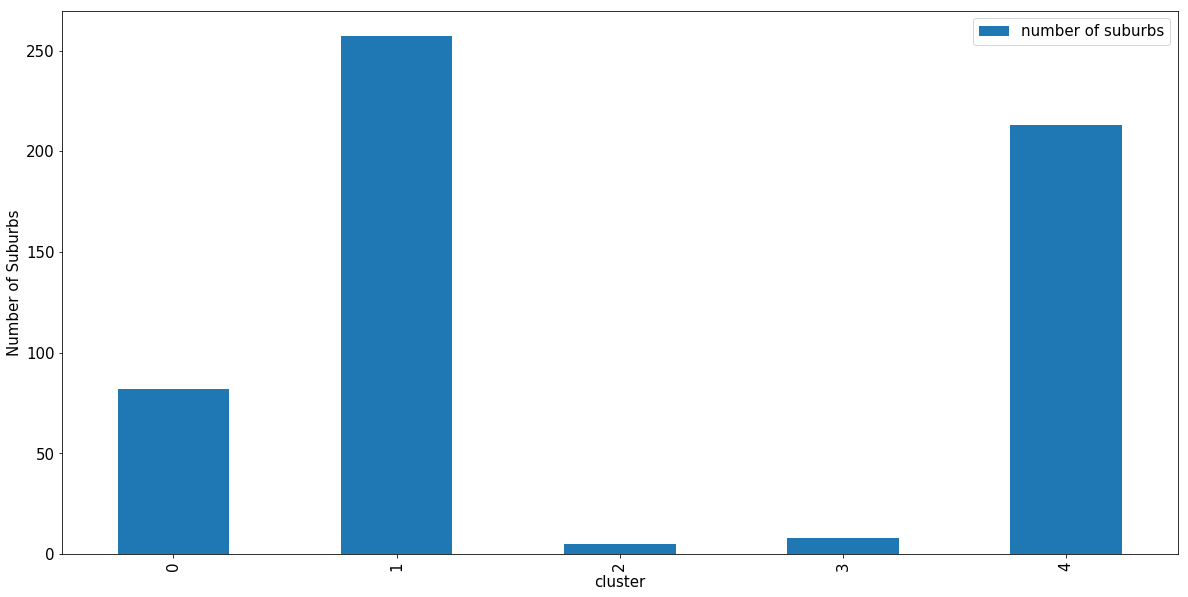

In [137]:
plt.rcParams.update({'font.size': 15})
ss.plot(x="cluster", y="number of suburbs", kind="bar",figsize =(20,10))
plt.ylabel("Number of Suburbs")
plt.show